In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline

In [4]:
import sys
sys.executable

'/Users/daniel/anaconda3/bin/python'

In [5]:
import quandl
import datetime as dt
import numpy as np
import pandas as pd

In [6]:
quandl.ApiConfig.api_key="MahdHLBnn64NQinuLxfz"

In [7]:
tickers = pd.read_csv('sharadar_ticker_list.csv')
tickers = pd.DataFrame(tickers)

In [8]:
biz_services = tickers.famaindustry=='Business Services'
banking = tickers.famaindustry=='Banking'
pharma = tickers.famaindustry=='Pharmaceutical Products'

In [9]:
cap_sizes = tickers.scalemarketcap
biz_services = pd.Series(np.logical_and(biz_services, 
                                      cap_sizes != '1 - Nano'))
biz_services = pd.Series(np.logical_and(biz_services, 
                                      cap_sizes != '2 - Micro'))
tickers_biz_services = tickers.ticker[biz_services].tolist()

banking = pd.Series(np.logical_and(banking, 
                                      cap_sizes != '1 - Nano'))
banking = pd.Series(np.logical_and(banking, 
                                      cap_sizes != '2 - Micro'))
tickers_banking = tickers.ticker[banking].tolist()


pharma = pd.Series(np.logical_and(pharma, 
                                      cap_sizes != '1 - Nano'))
pharma = pd.Series(np.logical_and(pharma, 
                                      cap_sizes != '2 - Micro'))
tickers_pharma = tickers.ticker[pharma].tolist()

In [13]:
tickers_large_cap = pd.read_csv("tickers.csv")
tickers_large_cap = tickers_large_cap.large_cap.tolist()

In [14]:
features={"columns":['ticker','datekey', 'price', 'revenue',
                    'bvps', 'assetturnover', 'cashnequsd',
                    'de', 'debtusd', 'divyield',
                    'dps', 'ebitdamargin', 'epsusd', 'ev', 'evebit',
                    'evebitda', 'fcfps', 'grossmargin', 'intangibles',
                    'netmargin', 'payoutratio', 'pb', 'pe', 'pe1',
                    'ps', 'ps1', 'revenueusd', 'roa', 'roe',
                    'roic', 'ros', 'sharefactor', 'sps', 'tbvps']}

In [15]:
t = quandl.get_table('SHARADAR/SF1', qopts=features,
                       paginate=True)

In [16]:
tickers_av = t['ticker'].tolist()

In [17]:
ticks_large_cap = list()
ticks_biz = list()
ticks_bank = list()
ticks_pharma = list()
for tik in tickers_large_cap:
    if tik in tickers_av:
        ticks_large_cap.append(tik)
for tik in tickers_biz_services:
    if tik in tickers_av:
        ticks_biz.append(tik)
for tik in tickers_banking:
    if tik in tickers_av:
        ticks_bank.append(tik)
for tik in tickers_pharma:
    if tik in tickers_av:
        ticks_pharma.append(tik)

In [19]:
t1_large_cap = quandl.get_table('SHARADAR/SF1', qopts=features, 
                      dimension='MRY', ticker=ticks_large_cap[0:300], 
                      paginate=True)
t2_large_cap = quandl.get_table('SHARADAR/SF1', qopts=features, 
                      dimension='MRY', ticker=ticks_large_cap[300:600], 
                      paginate=True)
t3_large_cap = quandl.get_table('SHARADAR/SF1', qopts=features, 
                      dimension='MRY', ticker=ticks_large_cap[600:900], 
                      paginate=True)
t4_large_cap = quandl.get_table('SHARADAR/SF1', qopts=features, 
                      dimension='MRY', ticker=ticks_large_cap[900:], 
                      paginate=True)

t1_biz = quandl.get_table('SHARADAR/SF1', qopts=features, 
                      dimension='MRY', ticker=ticks_biz[0:300], 
                      paginate=True)
t2_biz = quandl.get_table('SHARADAR/SF1', qopts=features, 
                      dimension='MRY', ticker=ticks_biz[300:600], 
                      paginate=True)
t3_biz = quandl.get_table('SHARADAR/SF1', qopts=features, 
                      dimension='MRY', ticker=ticks_biz[600:], 
                      paginate=True)

t1_bank = quandl.get_table('SHARADAR/SF1', qopts=features, 
                      dimension='MRY', ticker=ticks_bank[0:300], 
                      paginate=True)
t2_bank = quandl.get_table('SHARADAR/SF1', qopts=features, 
                      dimension='MRY', ticker=ticks_bank[300:], 
                      paginate=True)

t1_pharma = quandl.get_table('SHARADAR/SF1', qopts=features, 
                      dimension='MRY', ticker=ticks_pharma[0:300], 
                      paginate=True)
t2_pharma = quandl.get_table('SHARADAR/SF1', qopts=features, 
                      dimension='MRY', ticker=ticks_pharma[300:], 
                      paginate=True)

In [20]:
all_data_large_cap = pd.concat([t1_large_cap, t2_large_cap, 
                               t3_large_cap, t4_large_cap])
all_data_biz = pd.concat([t1_biz, t2_biz, t3_biz])
all_data_bank = pd.concat([t1_bank, t2_bank])
all_data_pharma = pd.concat([t1_pharma, t2_pharma])

In [21]:
all_data_large_cap = all_data_large_cap.dropna(axis=0)
all_data_biz = all_data_biz.dropna(axis=0)
all_data_bank = all_data_bank.dropna(axis=0)
all_data_pharma = all_data_pharma.dropna(axis=0)

In [22]:
all_data_large_cap.index = list(range(all_data_large_cap.shape[0]))
all_data_biz.index = list(range(all_data_biz.shape[0]))
all_data_bank.index = list(range(all_data_bank.shape[0]))
all_data_pharma.index = list(range(all_data_pharma.shape[0]))

In [23]:
count = 0
for i in range(all_data_large_cap.shape[0] - 1):
    if all_data_large_cap.ticker[i] == all_data_large_cap.ticker[i+1]:
        if count == 0:
            all_data_large_cap.loc[i, 'price_change'] = np.nan
            all_data_large_cap.loc[i, 'price_change%'] = np.nan
            count += 1
        if (all_data_large_cap.datekey[i] - all_data_large_cap.datekey[i+1]).days > 0:
            price_change = all_data_large_cap.price[i] - all_data_large_cap.price[i+1]
            if (price_change > 0) and ((price_change / all_data_large_cap.price[i+1]) > 0.105):
                all_data_large_cap.loc[i+1, 'price_change'] = 1
                all_data_large_cap.loc[i+1, 'price_change%'] = (price_change / all_data_large_cap.price[i+1])
            else:
                all_data_large_cap.loc[i+1, 'price_change'] = -1
                all_data_large_cap.loc[i+1, 'price_change%'] = (price_change / all_data_large_cap.price[i+1])
        else:
            print('error')
            break
    else:
        count = 0
        continue
print('done large_cap')

count = 0
for i in range(all_data_biz.shape[0] - 1):
    if all_data_biz.ticker[i] == all_data_biz.ticker[i+1]:
        if count == 0:
            all_data_biz.loc[i, 'price_change'] = np.nan
            all_data_biz.loc[i, 'price_change%'] = np.nan
            count += 1
        if (all_data_biz.datekey[i] - all_data_biz.datekey[i+1]).days > 0:
            price_change = all_data_biz.price[i] - all_data_biz.price[i+1]
            if (price_change > 0) and ((price_change / all_data_biz.price[i+1]) > 0.105):
                all_data_biz.loc[i+1, 'price_change'] = 1
                all_data_biz.loc[i+1, 'price_change%'] = (price_change / all_data_biz.price[i+1])
            else:
                all_data_biz.loc[i+1, 'price_change'] = -1
                all_data_biz.loc[i+1, 'price_change%'] = (price_change / all_data_biz.price[i+1])
        else:
            print('error')
            break
    else:
        count = 0
        continue
print('done biz')


count = 0
for i in range(all_data_bank.shape[0] - 1):
    if all_data_bank.ticker[i] == all_data_bank.ticker[i+1]:
        if count == 0:
            all_data_bank.loc[i, 'price_change'] = np.nan
            all_data_bank.loc[i, 'price_change%'] = np.nan
            count += 1
        if (all_data_bank.datekey[i] - all_data_bank.datekey[i+1]).days > 0:
            price_change = all_data_bank.price[i] - all_data_bank.price[i+1]
            if (price_change > 0) and ((price_change / all_data_bank.price[i+1]) > 0.105):
                all_data_bank.loc[i+1, 'price_change'] = 1
                all_data_bank.loc[i+1, 'price_change%'] = (price_change / all_data_bank.price[i+1])
            else:
                all_data_bank.loc[i+1, 'price_change'] = -1
                all_data_bank.loc[i+1, 'price_change%'] = (price_change / all_data_bank.price[i+1])
        else:
            print('error')
            break
    else:
        count = 0
        continue
print('done bank')
        
count = 0
for i in range(all_data_pharma.shape[0] - 1):
    if all_data_pharma.ticker[i] == all_data_pharma.ticker[i+1]:
        if count == 0:
            all_data_pharma.loc[i, 'price_change'] = np.nan
            all_data_pharma.loc[i, 'price_change%'] = np.nan
            count += 1
        if (all_data_pharma.datekey[i] - all_data_pharma.datekey[i+1]).days > 0:
            price_change = all_data_pharma.price[i] - all_data_pharma.price[i+1]
            if (price_change > 0) and ((price_change / all_data_pharma.price[i+1]) > 0.105):
                all_data_pharma.loc[i+1, 'price_change'] = 1
                all_data_pharma.loc[i+1, 'price_change%'] = (price_change / all_data_pharma.price[i+1])
            else:
                all_data_pharma.loc[i+1, 'price_change'] = -1
                all_data_pharma.loc[i+1, 'price_change%'] = (price_change / all_data_pharma.price[i+1])
        else:
            print('error')
            break
    else:
        count = 0
        continue
print('done pharma')

done large_cap
done biz
done bank
done pharma


In [24]:
all_data_large_cap = all_data_large_cap.dropna(axis=0)
all_data_biz = all_data_biz.dropna(axis=0)
all_data_bank = all_data_bank.dropna(axis=0)
all_data_pharma = all_data_pharma.dropna(axis=0)

In [25]:
all_data_large_cap_trimmed = all_data_large_cap.drop(columns=['ticker',
                                                    'datekey', 
                                                    'revenue', 'price_change%'])
all_data_biz_trimmed = all_data_biz.drop(columns=['ticker',
                                                    'datekey', 
                                                    'revenue', 'price_change%'])
all_data_bank_trimmed = all_data_bank.drop(columns=['ticker', 
                                                    'datekey', 
                                                    'revenue', 'price_change%'])
all_data_pharma_trimmed = all_data_pharma.drop(columns=['ticker', 
                                                    'datekey', 
                                                    'revenue', 'price_change%'])

In [26]:
past_2016 = all_data_large_cap.datekey > dt.datetime(2016, 1, 1)

In [27]:
large_cap_past_2016 = all_data_large_cap.datekey > dt.datetime(2016, 1, 1)
biz_past_2016 = all_data_biz.datekey > dt.datetime(2016, 1, 1)
bank_past_2016 = all_data_bank.datekey > dt.datetime(2016, 1, 1)
pharma_past_2016 = all_data_pharma.datekey > dt.datetime(2016, 1, 1)

train_set_large_cap = all_data_large_cap_trimmed[-large_cap_past_2016]
train_labels_large_cap = train_set_large_cap.price_change
train_set_large_cap = train_set_large_cap.drop(columns='price_change')
test_set_large_cap = all_data_large_cap_trimmed[large_cap_past_2016]
test_labels_large_cap = test_set_large_cap.price_change
test_set_large_cap = test_set_large_cap.drop(columns='price_change')

train_set_biz = all_data_biz_trimmed[-biz_past_2016]
train_labels_biz = train_set_biz.price_change
train_set_biz = train_set_biz.drop(columns='price_change')
test_set_biz = all_data_biz_trimmed[biz_past_2016]
test_labels_biz = test_set_biz.price_change
test_set_biz = test_set_biz.drop(columns='price_change')

train_set_bank = all_data_bank_trimmed[-bank_past_2016]
train_labels_bank = train_set_bank.price_change
train_set_bank = train_set_bank.drop(columns='price_change')
test_set_bank = all_data_bank_trimmed[bank_past_2016]
test_labels_bank = test_set_bank.price_change
test_set_bank = test_set_bank.drop(columns='price_change')

train_set_pharma = all_data_pharma_trimmed[-pharma_past_2016]
train_labels_pharma = train_set_pharma.price_change
train_set_pharma = train_set_pharma.drop(columns='price_change')
test_set_pharma = all_data_pharma_trimmed[pharma_past_2016]
test_labels_pharma = test_set_pharma.price_change
test_set_pharma = test_set_pharma.drop(columns='price_change')

In [28]:
X_large_cap = train_set_large_cap.apply(pd.to_numeric)
y_large_cap = train_labels_large_cap
X_test_large_cap = test_set_large_cap.apply(pd.to_numeric)
y_test_large_cap = test_labels_large_cap

X_biz = train_set_biz.apply(pd.to_numeric)
y_biz = train_labels_biz
X_test_biz = test_set_biz.apply(pd.to_numeric)
y_test_biz = test_labels_biz

X_bank = train_set_bank.apply(pd.to_numeric)
y_bank = train_labels_bank
X_test_bank = test_set_bank.apply(pd.to_numeric)
y_test_bank = test_labels_bank

X_pharma = train_set_pharma.apply(pd.to_numeric)
y_pharma = train_labels_pharma
X_test_pharma = test_set_pharma.apply(pd.to_numeric)
y_test_pharma = test_labels_pharma

# We now have all of our data, with the response being the variable 'price_change'. We take it through a transformation pipeline.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
from pandas.plotting import scatter_matrix

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn.metrics import confusion_matrix

# We try a random forest

In [34]:
import sklearn as sk

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score

In [37]:
import optunity
import optunity.metrics

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
def informedness_score(y, y_pred):
    confusion = confusion_matrix(y_true=y, y_pred=y_pred,
                                labels=[1.0, -1.0])
    tn = confusion[1,1]
    tp = confusion[0,0]
    fn = confusion[0,1]
    fp = confusion[1,0]
    inverse_recall = tn / (fp + tn)
    TPR = tp / (tp + fn)
    FPR = fp / (fp + tn)
    informed = TPR - FPR
    return informed



def informedness(y, y_pred):
    confusion = confusion_matrix(y_true=y, y_pred=y_pred,
                                labels=[1.0, -1.0])
    tn = confusion[1,1]
    tp = confusion[0,0]
    fn = confusion[0,1]
    fp = confusion[1,0]
    inverse_recall = tn / (fp + tn)
    TPR = tp / (tp + fn)
    FPR = fp / (fp + tn)
    informed = TPR - FPR
    return informed

informedness = make_scorer(informedness)

def markedness_score(y, y_pred):
    confusion = confusion_matrix(y_true=y, y_pred=y_pred)
    tn = confusion[0,0]
    fn = confusion[1,0]
    inverse_precision = tn / (tn + fn)
    mark = precision_score(y_true=y, y_pred=y_pred) + inverse_precision - 1
    return mark

def markedness(y, y_pred):
    confusion = confusion_matrix(y_true=y, y_pred=y_pred)
    tn = confusion[0,0]
    fn = confusion[1,0]
    inverse_precision = tn / (tn + fn)
    mark = precision_score(y_true=y, y_pred=y_pred) + inverse_precision - 1
    return mark

markedness = make_scorer(markedness)

In [62]:
constraints = {
    'depth': 1, 'min_leaf':1, 'min_split':1, 'n_trees':1
}


@optunity.cross_validated(x=X_large_cap.values, y=y_large_cap.values, num_folds=5)
def forest_cv_validation_cap(x_train, y_train, x_test, y_test, n_trees, depth, min_leaf, min_split):
    forest_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(bootstrap=True, oob_score=True,
                                     n_jobs=-1, random_state=42,
                                     n_estimators=int(n_trees), max_depth=int(depth), 
                                     min_samples_leaf=int(min_leaf),
                                     min_samples_split=int(min_split)))
    ])
    model = forest_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_precision = precision_score(y_true=y_test, y_pred=decision_values)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

forest_cv_validation_cap = optunity.wrap_constraints(forest_cv_validation_cap, default=0, lb_o=constraints)

In [63]:
solver = optunity.solvers.ParticleSwarm(num_particles=20, num_generations=10, n_trees=[100, 500], 
                                        depth=[5, 20], min_leaf=[25, 75], min_split=[6, 10])

In [64]:
%%time
optimal_forest_cap_params, optimal_forest_cap_info = solver.maximize(forest_cv_validation_cap)

print('done')

done
CPU times: user 50min 6s, sys: 1min 4s, total: 51min 11s
Wall time: 30min 44s


In [65]:
constraints = {
    'depth': 1, 'min_leaf':1, 'min_split':1, 'n_trees':1
}


@optunity.cross_validated(x=X_biz.values, y=y_biz.values, num_folds=5)
def forest_cv_validation_biz(x_train, y_train, x_test, y_test, n_trees, depth, min_leaf, min_split):
    forest_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(bootstrap=True, oob_score=True,
                                     n_jobs=-1, random_state=42,
                                     n_estimators=int(n_trees), max_depth=int(depth), 
                                     min_samples_leaf=int(min_leaf),
                                     min_samples_split=int(min_split)))
    ])
    model = forest_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_precision = precision_score(y_true=y_test, y_pred=decision_values)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

forest_cv_validation_biz = optunity.wrap_constraints(forest_cv_validation_biz, default=0, lb_o=constraints)

In [66]:
%%time
optimal_forest_biz_params, optimal_forest_biz_info = solver.maximize(forest_cv_validation_biz)

print('done')

done
CPU times: user 15min 25s, sys: 55.8 s, total: 16min 21s
Wall time: 13min 45s


In [67]:
@optunity.cross_validated(x=X_bank.values, y=y_bank.values, num_folds=5)
def forest_cv_validation_bank(x_train, y_train, x_test, y_test, n_trees, depth, min_leaf, min_split):
    forest_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(bootstrap=True, oob_score=True,
                                     n_jobs=-1, random_state=42,
                                     n_estimators=int(n_trees), max_depth=int(depth), 
                                     min_samples_leaf=int(min_leaf),
                                     min_samples_split=int(min_split)))
    ])
    model = forest_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_precision = precision_score(y_true=y_test, y_pred=decision_values)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

forest_cv_validation_bank = optunity.wrap_constraints(forest_cv_validation_bank, default=0, lb_o=constraints)

In [68]:
%%time
optimal_forest_bank_params, optimal_forest_bank_info = solver.maximize(forest_cv_validation_bank)

print('done')

done
CPU times: user 22min 56s, sys: 1min 28s, total: 24min 24s
Wall time: 21min 4s


In [69]:
@optunity.cross_validated(x=X_pharma.values, y=y_pharma.values, num_folds=5)
def forest_cv_validation_pharma(x_train, y_train, x_test, y_test, n_trees, depth, min_leaf, min_split):
    forest_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(bootstrap=True, oob_score=True,
                                     n_jobs=-1, random_state=42,
                                     n_estimators=int(n_trees), max_depth=int(depth), 
                                     min_samples_leaf=int(min_leaf),
                                     min_samples_split=int(min_split)))
    ])
    model = forest_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_precision = precision_score(y_true=y_test, y_pred=decision_values)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

forest_cv_validation_pharma = optunity.wrap_constraints(forest_cv_validation_pharma, default=0, lb_o=constraints)

In [70]:
%%time
optimal_forest_pharma_params, optimal_forest_pharma_info = solver.maximize(forest_cv_validation_pharma)

print('done')

done
CPU times: user 15min 14s, sys: 1min 24s, total: 16min 39s
Wall time: 16min 2s


In [238]:
optimal_forest_cap_params
optimal_forest_biz_params
optimal_forest_bank_params
optimal_forest_pharma_params

{'n_trees': 296.3828125,
 'depth': 10.517193763520748,
 'min_leaf': 29.2545755416967,
 'min_split': 7.280546875}

{'n_trees': 141.29838983226753,
 'depth': 14.839112308306898,
 'min_leaf': 52.61445710135788,
 'min_split': 6.600060109074332}

{'n_trees': 308.8203125,
 'depth': 15.341175449205972,
 'min_leaf': 16.873671381194917,
 'min_split': 7.823671875}

{'n_trees': 371.4550272376997,
 'depth': 15.451901351316222,
 'min_leaf': 29.48494039665839,
 'min_split': 6.891704687155587}

In [394]:
%%capture
optimal_forest_pipe_cap = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(bootstrap=True, oob_score=True,
                                     n_jobs=-1, random_state=42,
                                     n_estimators=int(optimal_forest_cap_params['n_trees']), 
                                      max_depth=int(optimal_forest_cap_params['depth']), 
                                     min_samples_leaf=int(optimal_forest_cap_params['min_leaf']),
                                     min_samples_split=int(optimal_forest_cap_params['min_split'])))
])

optimal_forest_cap = optimal_forest_pipe_cap.fit(X_large_cap, y_large_cap)

train_pred_cap = optimal_forest_cap.predict(X_large_cap)
test_pred_cap = optimal_forest_cap.predict(X_test_large_cap)

In [395]:
%%capture
optimal_forest_cap_cv_inform = cross_val_score(optimal_forest_cap, X=X_large_cap, y=y_large_cap, cv=5,
                                              scoring=informedness)
optimal_forest_cap_cv_precision = cross_val_score(optimal_forest_cap, X=X_large_cap, y=y_large_cap, cv=5,
                                              scoring=make_scorer(precision_score))
optimal_forest_cap_cv_recall = cross_val_score(optimal_forest_cap, X=X_large_cap, y=y_large_cap, cv=5,
                                              scoring=make_scorer(recall_score))
optimal_forest_cap_cv_accuracy = cross_val_score(optimal_forest_cap, X=X_large_cap, y=y_large_cap, cv=5,
                                              scoring=make_scorer(accuracy_score))

In [396]:
np.mean(optimal_forest_cap_cv_inform)
np.mean(optimal_forest_cap_cv_precision)
np.mean(optimal_forest_cap_cv_recall)
np.mean(optimal_forest_cap_cv_accuracy)
precision_score(y_true=y_test_large_cap, y_pred=test_pred_cap)
recall_score(y_true=y_test_large_cap, y_pred=test_pred_cap)
accuracy_score(y_true=y_test_large_cap, y_pred=test_pred_cap)
informedness_score(y=y_test_large_cap, y_pred=test_pred_cap)
confusion_matrix(y_true=y_test_large_cap, y_pred=test_pred_cap, labels=[1,-1])

0.15621241203837152

0.5855620164811365

0.5938931065897358

0.5783331783799064

0.535303776683087

0.4393530997304582

0.5791691751956652

0.13140968297311328

array([[326, 416],
       [283, 636]])

In [397]:
optimal_forest_pipe_biz = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(bootstrap=True, oob_score=True,
                                     n_jobs=-1, random_state=42,
                                     n_estimators=int(optimal_forest_biz_params['n_trees']), 
                                      max_depth=int(optimal_forest_biz_params['depth']), 
                                     min_samples_leaf=int(optimal_forest_biz_params['min_leaf']),
                                     min_samples_split=int(optimal_forest_biz_params['min_split'])))
])

optimal_forest_biz = optimal_forest_pipe_cap.fit(X_biz, y_biz)

train_pred_biz = optimal_forest_biz.predict(X_biz)
test_pred_biz = optimal_forest_biz.predict(X_test_biz)

In [398]:
%%capture
optimal_forest_biz_cv_inform = cross_val_score(optimal_forest_biz, X=X_biz, y=y_biz, cv=5,
                                              scoring=informedness)
optimal_forest_biz_cv_precision = cross_val_score(optimal_forest_biz, X=X_biz, y=y_biz, cv=5,
                                              scoring=make_scorer(precision_score))
optimal_forest_biz_cv_recall = cross_val_score(optimal_forest_biz, X=X_biz, y=y_biz, cv=5,
                                              scoring=make_scorer(recall_score))
optimal_forest_biz_cv_accuracy = cross_val_score(optimal_forest_biz, X=X_biz, y=y_biz, cv=5,
                                              scoring=make_scorer(accuracy_score))

In [399]:
np.mean(optimal_forest_biz_cv_inform)
np.mean(optimal_forest_biz_cv_precision)
np.mean(optimal_forest_biz_cv_recall)
np.mean(optimal_forest_biz_cv_accuracy)
precision_score(y_true=y_test_biz, y_pred=test_pred_biz)
recall_score(y_true=y_test_biz, y_pred=test_pred_biz)
accuracy_score(y_true=y_test_biz, y_pred=test_pred_biz)
informedness_score(y=y_test_biz, y_pred=test_pred_biz)
confusion_matrix(y_true=y_test_biz, y_pred=test_pred_biz, labels=[1,-1])

0.07347073920957266

0.5134433506690185

0.38179391682184977

0.5487338661509431

0.5

0.1867007672634271

0.45314685314685316

-0.03860787471188154

array([[ 73, 318],
       [ 73, 251]])

In [400]:
%%capture
optimal_forest_pipe_bank = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(bootstrap=True, oob_score=True,
                                     n_jobs=-1, random_state=42,
                                     n_estimators=int(optimal_forest_bank_params['n_trees']), 
                                      max_depth=int(optimal_forest_bank_params['depth']), 
                                     min_samples_leaf=int(optimal_forest_bank_params['min_leaf']),
                                     min_samples_split=int(optimal_forest_bank_params['min_split'])))
])

optimal_forest_bank = optimal_forest_pipe_bank.fit(X_bank, y_bank)

train_pred_bank = optimal_forest_bank.predict(X_bank)
test_pred_bank = optimal_forest_bank.predict(X_test_bank)

In [401]:
%%capture
optimal_forest_bank_cv_inform = cross_val_score(optimal_forest_bank, X=X_bank, y=y_bank, cv=5,
                                              scoring=informedness)
optimal_forest_bank_cv_precision = cross_val_score(optimal_forest_bank, X=X_bank, y=y_bank, cv=5,
                                              scoring=make_scorer(precision_score))
optimal_forest_bank_cv_recall = cross_val_score(optimal_forest_bank, X=X_bank, y=y_bank, cv=5,
                                              scoring=make_scorer(recall_score))
optimal_forest_bank_cv_accuracy = cross_val_score(optimal_forest_bank, X=X_bank, y=y_bank, cv=5,
                                              scoring=make_scorer(accuracy_score))

In [402]:
np.mean(optimal_forest_bank_cv_inform)
np.mean(optimal_forest_bank_cv_precision)
np.mean(optimal_forest_bank_cv_recall)
np.mean(optimal_forest_bank_cv_accuracy)
precision_score(y_true=y_test_bank, y_pred=test_pred_bank)
recall_score(y_true=y_test_bank, y_pred=test_pred_bank)
accuracy_score(y_true=y_test_bank, y_pred=test_pred_bank)
informedness_score(y=y_test_bank, y_pred=test_pred_bank)
confusion_matrix(y_true=y_test_bank, y_pred=test_pred_bank, labels=[1,-1])

0.21140169459299352

0.6575971700369618

0.7988426563791677

0.6377176948586056

0.3059360730593607

0.4557823129251701

0.6100840336134454

0.11649659863945577

array([[ 67,  80],
       [152, 296]])

In [403]:
%%capture
optimal_forest_pipe_pharma = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(bootstrap=True, oob_score=True,
                                     n_jobs=-1, random_state=42,
                                     n_estimators=int(optimal_forest_pharma_params['n_trees']), 
                                      max_depth=int(optimal_forest_pharma_params['depth']), 
                                     min_samples_leaf=int(optimal_forest_pharma_params['min_leaf']),
                                     min_samples_split=int(optimal_forest_pharma_params['min_split'])))
])

optimal_forest_pharma = optimal_forest_pipe_pharma.fit(X_pharma, y_pharma)

train_pred_pharma = optimal_forest_pharma.predict(X_pharma)
test_pred_pharma = optimal_forest_pharma.predict(X_test_pharma)

In [404]:
%%capture
optimal_forest_pharma_cv_inform = cross_val_score(optimal_forest_pharma, X=X_pharma, y=y_pharma, cv=5,
                                              scoring=informedness)
optimal_forest_pharma_cv_precision = cross_val_score(optimal_forest_pharma, X=X_pharma, y=y_pharma, cv=5,
                                              scoring=make_scorer(precision_score))
optimal_forest_pharma_cv_recall = cross_val_score(optimal_forest_pharma, X=X_pharma, y=y_pharma, cv=5,
                                              scoring=make_scorer(recall_score))
optimal_forest_pharma_cv_accuracy = cross_val_score(optimal_forest_pharma, X=X_pharma, y=y_pharma, cv=5,
                                              scoring=make_scorer(accuracy_score))

In [405]:
np.mean(optimal_forest_pharma_cv_inform)
np.mean(optimal_forest_pharma_cv_precision)
np.mean(optimal_forest_pharma_cv_recall)
np.mean(optimal_forest_pharma_cv_accuracy)
precision_score(y_true=y_test_pharma, y_pred=test_pred_pharma)
recall_score(y_true=y_test_pharma, y_pred=test_pred_pharma)
accuracy_score(y_true=y_test_pharma, y_pred=test_pred_pharma)
informedness_score(y=y_test_pharma, y_pred=test_pred_pharma)
confusion_matrix(y_true=y_test_pharma, y_pred=test_pred_pharma, labels=[1,-1])

0.12739030416631164

0.5311725095872211

0.44475945017182134

0.5770615973856577

0.4294117647058823

0.3882978723404255

0.5793650793650794

0.08133584702396979

array([[ 73, 115],
       [ 97, 219]])

In [ ]:
test_optimal_forest_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(bootstrap=True, oob_score=True,
                                     n_jobs=-1, random_state=42,
                                     n_estimators=int(253.11001641746455), max_depth=int(13.273655394661036), 
                                     min_samples_leaf=int(36.75644090766637),
                                     min_samples_split=int(8.709377882566423)))
])

optimal_forest = test_optimal_forest_pipe.fit(X_large_cap, y_large_cap)

train_pred = optimal_forest.predict(X_large_cap)
test_pred = optimal_forest.predict(X_test_large_cap)

precision_score(y_true=y_test_large_cap, y_pred=test_pred)
accuracy_score(y_true=y_test_large_cap, y_pred=test_pred)
balanced_accuracy_score(y_true=y_test_large_cap, y_pred=test_pred)

In [ ]:
confusion_matrix(y_true=y_test_large_cap, y_pred=test_pred)

In [ ]:
solver_2 = optunity.solvers.ParticleSwarm(num_particles=10, num_generations=15, n_trees=[200, 500], 
                                        depth=[5, 100], min_leaf=[2, 200], min_split=[5, 50])

In [ ]:
%%time
optimal_forest2, info2 = solver_2.maximize(forest_cv_validation)

print('done')

In [ ]:
optimal_forest2

In [ ]:
test_optimal_forest_pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(bootstrap=True, oob_score=True,
                                     n_jobs=-1, random_state=42,
                                     n_estimators=int(311.67144987558544), max_depth=int(40.28400571798756), 
                                     min_samples_leaf=int(3.1176171875000165),
                                     min_samples_split=int(25.218066406250003)))
])

optimal_forest2 = test_optimal_forest_pipe2.fit(X_bank, y_bank)

train_pred2 = optimal_forest2.predict(X_bank)
test_pred2 = optimal_forest2.predict(X_test_bank)

precision_score(y_true=y_test_bank, y_pred=test_pred2)
accuracy_score(y_true=y_test_bank, y_pred=test_pred2)
balanced_accuracy_score(y_true=y_test_bank, y_pred=test_pred2)

In [ ]:
%%time
optimal_forest_pars, info, _ = optunity.maximize(forest_cv_validation, 
                                                 solver_name="particle swarm",
                                                 n_trees=[100, 500], depth=[5, 20], 
                                                 min_leaf=[25, 75], min_split=[6, 10])
print("Optimal parameters: " + str(optimal_forest_pars))
print("Precision of tuned Random Forest: %1.6f" % info.optimum)

# Boosting Algorithm

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
boosting_test_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', GradientBoostingClassifier(loss='deviance',
                                          n_estimators=250,
                                          random_state=42))])

In [ ]:
boosting_fit_tst = boosting_test_pipe.fit(X_large_cap, y_large_cap)

In [ ]:
pred_boost_tst = boosting_fit_tst.predict(X_test_large_cap)

In [ ]:
accuracy_score(y_true=y_test_large_cap, y_pred=pred_boost_tst)

In [ ]:
confusion_matrix(y_true=y_test_large_cap, y_pred=pred_boost_tst)

In [ ]:
boost_tst = GradientBoostingClassifier(loss='deviance',
                                          n_estimators=250,
                                          random_state=42)
tst_fit =boost_tst.fit(pd.DataFrame(StandardScaler().fit_transform(X_large_cap)), y_large_cap)

In [ ]:
tst_importance = tst_fit.feature_importances_
tst_importance = 100.0 * (tst_importance / tst_importance.max())
sorted_tst_importance = np.argsort(tst_importance)
pos = np.arange(sorted_tst_importance.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, tst_importance[sorted_tst_importance], align='center')
plt.yticks(pos, X_large_cap.columns[sorted_tst_importance])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
gradient_boost_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(loss='deviance',
                                          max_features='sqrt',
                                          min_samples_split=int(0.005 * X_large_cap.shape[0]),
                                          random_state=42))
    ])

In [72]:
scores_gb = {'accuracy': make_scorer(accuracy_score, greater_is_better=True),
 'precision': make_scorer(precision_score, greater_is_better=True),
 'recall': make_scorer(recall_score, greater_is_better=True),
 'informedness': informedness}

In [73]:
learning_rate_grid = [0.0001, 0.001, 0.01, 0.1]
subsample_grid = [0.5, 0.8, 1]
max_depth_grid = [4, 5, 6, 7, 8]
n_estimators_grid = [40, 50, 60, 70, 80]
min_samples_leaf_grid = [0.005, 0.01]
gb_param_grid = [
    {'gb__learning_rate': learning_rate_grid,
     'gb__subsample': subsample_grid,
     'gb__max_depth': max_depth_grid,
     'gb__n_estimators': n_estimators_grid,
     'gb__min_samples_leaf': min_samples_leaf_grid
    }
]

In [ ]:
gb_cv_gridsearch_cap = GridSearchCV(gradient_boost_pipe, 
                                    gb_param_grid, 
                                    cv=5, scoring=scores_gb,
                                    return_train_score=True,
                                    refit='informedness'
                                    )
gb_cv_gridsearch_biz = GridSearchCV(gradient_boost_pipe, 
                                    gb_param_grid, 
                                    cv=5, scoring=scores_gb,
                                    return_train_score=True,
                                    refit='informedness'
                                    )
gb_cv_gridsearch_bank = GridSearchCV(gradient_boost_pipe, 
                                    gb_param_grid, 
                                    cv=5, scoring=scores_gb,
                                    return_train_score=True,
                                    refit='informedness'
                                    )
gb_cv_gridsearch_pharma = GridSearchCV(gradient_boost_pipe, 
                                    gb_param_grid, 
                                    cv=5, scoring=scores_gb,
                                    return_train_score=True,
                                    refit='informedness'
                                    )

In [ ]:
%%capture
gb_gridsearch_fit_cap = gb_cv_gridsearch_cap.fit(X_large_cap, y_large_cap)

In [ ]:
%%capture
gb_gridsearch_fit_biz = gb_cv_gridsearch_biz.fit(X_biz, y_biz)
gb_gridsearch_fit_bank = gb_cv_gridsearch_bank.fit(X_bank, y_bank)
gb_gridsearch_fit_pharma = gb_cv_gridsearch_pharma.fit(X_pharma, y_pharma)

In [246]:
constraints_lb_o = {
    'learning_rate':0.00000001,
    'max_depth': 0,
    'min_leaf': 0
}

constraints_range_oc = {
    'subsample':[0,1]
}

@optunity.cross_validated(x=X_large_cap.values, y=y_large_cap.values, num_folds=10)
def gradient_boosting_cv_validation_cap(x_train, y_train, x_test, y_test, learning_rate, depth, min_leaf,
                                       n_trees, subsample):
    gradient_boost_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', GradientBoostingClassifier(loss='deviance', learning_rate=learning_rate,
                                          subsample=subsample, max_depth=depth,
                                          max_features='sqrt', n_estimators=int(n_trees),
                                          min_samples_split=int(0.005 * X_large_cap.shape[0]),
                                          min_samples_leaf=min_leaf,
                                          random_state=42))
    ])
    model = gradient_boost_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_precision = precision_score(y_true=y_test, y_pred=decision_values)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

In [247]:
optimal_gradient_boost_cap, info_gb_cap, info2_gb_cap = optunity.maximize(gradient_boosting_cv_validation_cap, 
                                                                          num_evals = 300, 
                                                                          solver_name='particle swarm', 
                                                                          learning_rate=[0.001, 0.1], 
                                                                          depth=[6, 10], 
                                                                          min_leaf=[0.01, 0.03],
                                                                         n_trees=[30, 70],
                                                                         subsample=[0.5, 0.9])

In [75]:
@optunity.cross_validated(x=X_biz.values, y=y_biz.values, num_folds=5)
def gradient_boosting_cv_validation_biz(x_train, y_train, x_test, y_test, learning_rate, depth, min_leaf,
                                       n_trees, subsample):
    gradient_boost_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', GradientBoostingClassifier(loss='deviance', learning_rate=learning_rate,
                                          subsample=subsample, max_depth=depth,
                                          max_features='sqrt',n_estimators=int(n_trees),
                                          min_samples_split=int(0.005 * X_large_cap.shape[0]),
                                          min_samples_leaf=min_leaf,
                                          random_state=42))
    ])
    model = gradient_boost_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_precision = precision_score(y_true=y_test, y_pred=decision_values)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

In [ ]:
info2_gb_biz

In [76]:
optimal_gradient_boost_biz, info_gb_biz, info2_gb_biz = optunity.maximize(gradient_boosting_cv_validation_biz, 
                                                                          num_evals = 300, 
                                                                          solver_name='particle swarm', 
                                                                          learning_rate=[0.01, 0.5], 
                                                                          depth=[4, 8], 
                                                                          min_leaf=[0.005, 0.02],
                                                                         n_trees=[30, 70],
                                                                         subsample=[0.5, 0.9])

In [77]:
@optunity.cross_validated(x=X_bank.values, y=y_bank.values, num_folds=5)
def gradient_boosting_cv_validation_bank(x_train, y_train, x_test, y_test, learning_rate, depth, min_leaf,
                                        n_trees, subsample):
    gradient_boost_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', GradientBoostingClassifier(loss='deviance', learning_rate=learning_rate,
                                          subsample=subsample, max_depth=depth,
                                          max_features='sqrt',n_estimators=int(n_trees),
                                          min_samples_split=int(0.005 * X_large_cap.shape[0]),
                                          min_samples_leaf=min_leaf,
                                          random_state=42))
    ])
    model = gradient_boost_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_precision = precision_score(y_true=y_test, y_pred=decision_values)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

In [ ]:
optimal_gradient_boost_bank

In [78]:
optimal_gradient_boost_bank, info_gb_bank, info2_gb_bank = optunity.maximize(gradient_boosting_cv_validation_bank, 
                                                                          num_evals = 300, 
                                                                          solver_name='particle swarm', 
                                                                          learning_rate=[0.01, 0.5], 
                                                                          depth=[4, 8], 
                                                                          min_leaf=[0.0025, 0.01],
                                                                            n_trees=[30, 70],
                                                                         subsample=[0.5, 0.9])

In [79]:
@optunity.cross_validated(x=X_pharma.values, y=y_pharma.values, num_folds=5)
def gradient_boosting_cv_validation_pharma(x_train, y_train, x_test, y_test, learning_rate, depth, min_leaf,
                                          n_trees):
    gradient_boost_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', GradientBoostingClassifier(loss='deviance', learning_rate=learning_rate,
                                          subsample=1, max_depth=depth,
                                          max_features='sqrt',n_estimators=int(n_trees),
                                          min_samples_split=int(0.005 * X_large_cap.shape[0]),
                                          min_samples_leaf=min_leaf,
                                          random_state=42))
    ])
    model = gradient_boost_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_precision = precision_score(y_true=y_test, y_pred=decision_values)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

In [ ]:
gb_gridsearch_fit_pharma.best_score_

In [80]:
optimal_gradient_boost_pharma, info_gb_pharma, info2_gb_pharma = optunity.maximize(gradient_boosting_cv_validation_pharma, 
                                                                          num_evals = 300, 
                                                                          solver_name='particle swarm', 
                                                                          learning_rate=[0.01, 0.2], 
                                                                          depth=[4, 10], 
                                                                          min_leaf=[0.005, 0.02],
                                                                                  n_trees=[30, 70])

In [ ]:
optimal_gradient_boost_cap

In [251]:
optimal_gradient_boost_cap

{'learning_rate': 0.0689387860489129,
 'depth': 7.439397443371404,
 'min_leaf': 0.02374862462945151,
 'n_trees': 55.25963541666667,
 'subsample': 0.688398492919186}

In [406]:
%%capture
optimal_gradient_pipe_cap = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', GradientBoostingClassifier(loss='deviance',
                                          learning_rate=optimal_gradient_boost_cap['learning_rate'],
                                          subsample=optimal_gradient_boost_cap['subsample'],
                                          n_estimators=int(optimal_gradient_boost_cap['n_trees']), 
                                          max_depth=optimal_gradient_boost_cap['depth'],
                                          min_samples_leaf=optimal_gradient_boost_cap['min_leaf'],
                                          min_samples_split=int(0.005 * X_large_cap.shape[0]),
                                          random_state=42))
    ])

optimal_gradient_fit_cap = optimal_gradient_pipe_cap.fit(X_large_cap, y_large_cap)

In [407]:
%%capture
optimal_gradient_cv_inform_cap = cross_val_score(optimal_gradient_pipe_cap, X=X_large_cap, y=y_large_cap, cv=5,
                                           scoring=informedness)
optimal_gradient_cv_precision_cap = cross_val_score(optimal_gradient_pipe_cap, X=X_large_cap, y=y_large_cap, cv=5,
                                           scoring=make_scorer(precision_score))
optimal_gradient_cv_recall_cap = cross_val_score(optimal_gradient_pipe_cap, X=X_large_cap, y=y_large_cap, cv=5,
                                           scoring=make_scorer(recall_score))
optimal_gradient_cv_accuracy_cap = cross_val_score(optimal_gradient_pipe_cap, X=X_large_cap, y=y_large_cap, cv=5,
                                           scoring=make_scorer(accuracy_score))
gb_pred_cap = optimal_gradient_fit_cap.predict(X_test_large_cap)

In [408]:
np.mean(optimal_gradient_cv_inform_cap)
np.mean(optimal_gradient_cv_precision_cap)
np.mean(optimal_gradient_cv_recall_cap)
np.mean(optimal_gradient_cv_accuracy_cap)

0.1435668344084282

0.5774524533400446

0.5988561595303168

0.5721789507018845

In [409]:
informedness_score(y_pred=gb_pred_cap, y=y_test_large_cap)
precision_score(y_pred=gb_pred_cap, y_true=y_test_large_cap)
recall_score(y_pred=gb_pred_cap, y_true=y_test_large_cap)
accuracy_score(y_pred=gb_pred_cap, y_true=y_test_large_cap)
confusion_matrix(y_pred=gb_pred_cap, y_true=y_test_large_cap,
                labels=[1, -1])

0.08658626363473715

0.5023474178403756

0.4326145552560647

0.5550872968091511

array([[321, 421],
       [318, 601]])

In [410]:
optimal_gradient_pipe_biz = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', GradientBoostingClassifier(loss='deviance',
                                          learning_rate=optimal_gradient_boost_biz['learning_rate'],
                                          subsample=optimal_gradient_boost_biz['subsample'],
                                          n_estimators=int(optimal_gradient_boost_biz['n_trees']), 
                                          max_depth=optimal_gradient_boost_biz['depth'],
                                          min_samples_leaf=optimal_gradient_boost_biz['min_leaf'],
                                          min_samples_split=int(0.005 * X_large_cap.shape[0]),
                                          random_state=42))
    ])

optimal_gradient_fit_biz = optimal_gradient_pipe_biz.fit(X_biz, y_biz)

In [411]:
%%capture
optimal_gradient_cv_inform_biz = cross_val_score(optimal_gradient_pipe_biz, X=X_biz, y=y_biz, cv=5,
                                           scoring=informedness)
optimal_gradient_cv_precision_biz = cross_val_score(optimal_gradient_pipe_biz, X=X_biz, y=y_biz, cv=5,
                                           scoring=make_scorer(precision_score))
optimal_gradient_cv_recall_biz = cross_val_score(optimal_gradient_pipe_biz, X=X_biz, y=y_biz, cv=5,
                                           scoring=make_scorer(recall_score))
optimal_gradient_cv_accuracy_biz = cross_val_score(optimal_gradient_pipe_biz, X=X_biz, y=y_biz, cv=5,
                                           scoring=make_scorer(accuracy_score))
gb_pred_biz = optimal_gradient_fit_biz.predict(X_test_biz)

In [412]:
np.mean(optimal_gradient_cv_inform_biz)
np.mean(optimal_gradient_cv_precision_biz)
np.mean(optimal_gradient_cv_recall_biz)
np.mean(optimal_gradient_cv_accuracy_biz)

0.02827383421442039

0.4767488471341202

0.44514587212911233

0.5194820512483351

In [413]:
informedness_score(y_pred=gb_pred_biz, y=y_test_biz)
precision_score(y_pred=gb_pred_biz, y_true=y_test_biz)
recall_score(y_pred=gb_pred_biz, y_true=y_test_biz)
accuracy_score(y_pred=gb_pred_biz, y_true=y_test_biz)
confusion_matrix(y_pred=gb_pred_biz, y_true=y_test_biz,
                labels=[1, -1])

-0.01928420321429697

0.5321888412017167

0.3171355498721228

0.47412587412587415

array([[124, 267],
       [109, 215]])

In [414]:
optimal_gradient_pipe_bank = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', GradientBoostingClassifier(loss='deviance',
                                          learning_rate=optimal_gradient_boost_bank['learning_rate'],
                                          subsample=optimal_gradient_boost_bank['subsample'],
                                          n_estimators=int(optimal_gradient_boost_bank['n_trees']), 
                                          max_depth=optimal_gradient_boost_bank['depth'],
                                          min_samples_leaf=optimal_gradient_boost_bank['min_leaf'],
                                          min_samples_split=int(0.005 * X_large_cap.shape[0]),
                                          random_state=42))
    ])

optimal_gradient_fit_bank = optimal_gradient_pipe_bank.fit(X_bank, y_bank)

/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [415]:
%%capture
optimal_gradient_cv_inform_bank = cross_val_score(optimal_gradient_pipe_bank, X=X_bank, y=y_bank, cv=5,
                                           scoring=informedness)
optimal_gradient_cv_precision_bank = cross_val_score(optimal_gradient_pipe_bank, X=X_bank, y=y_bank, cv=5,
                                           scoring=make_scorer(precision_score))
optimal_gradient_cv_recall_bank = cross_val_score(optimal_gradient_pipe_bank, X=X_bank, y=y_bank, cv=5,
                                           scoring=make_scorer(recall_score))
optimal_gradient_cv_accuracy_bank = cross_val_score(optimal_gradient_pipe_bank, X=X_bank, y=y_bank, cv=5,
                                           scoring=make_scorer(accuracy_score))
gb_pred_bank = optimal_gradient_fit_bank.predict(X_test_bank)

In [416]:
np.mean(optimal_gradient_cv_inform_bank)
np.mean(optimal_gradient_cv_precision_bank)
np.mean(optimal_gradient_cv_recall_bank)
np.mean(optimal_gradient_cv_accuracy_bank)

0.2335272448068438

0.6725152105660388

0.7432846514191238

0.6377289402431932

In [417]:
informedness_score(y_pred=gb_pred_bank, y=y_test_bank)
precision_score(y_pred=gb_pred_bank, y_true=y_test_bank)
recall_score(y_pred=gb_pred_bank, y_true=y_test_bank)
accuracy_score(y_pred=gb_pred_bank, y_true=y_test_bank)
confusion_matrix(y_pred=gb_pred_bank, y_true=y_test_bank,
                labels=[1, -1])

0.11447704081632654

0.3026315789473684

0.46938775510204084

0.6016806722689075

array([[ 69,  78],
       [159, 289]])

In [418]:
optimal_gradient_pipe_pharma = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', GradientBoostingClassifier(loss='deviance',
                                          learning_rate=optimal_gradient_boost_pharma['learning_rate'],
                                          subsample=1,
                                          n_estimators=int(optimal_gradient_boost_pharma['n_trees']), 
                                          max_depth=optimal_gradient_boost_pharma['depth'],
                                          min_samples_leaf=optimal_gradient_boost_pharma['min_leaf'],
                                          min_samples_split=int(0.005 * X_large_cap.shape[0]),
                                          random_state=42))
    ])

optimal_gradient_fit_pharma = optimal_gradient_pipe_pharma.fit(X_pharma, y_pharma)

In [419]:
%%capture
optimal_gradient_cv_inform_pharma = cross_val_score(optimal_gradient_pipe_pharma, X=X_pharma, y=y_pharma, cv=5,
                                           scoring=informedness)
optimal_gradient_cv_precision_pharma = cross_val_score(optimal_gradient_pipe_pharma, X=X_pharma, y=y_pharma, cv=5,
                                           scoring=make_scorer(precision_score))
optimal_gradient_cv_recall_pharma = cross_val_score(optimal_gradient_pipe_pharma, X=X_pharma, y=y_pharma, cv=5,
                                           scoring=make_scorer(recall_score))
optimal_gradient_cv_accuracy_pharma = cross_val_score(optimal_gradient_pipe_pharma, X=X_pharma, y=y_pharma, cv=5,
                                           scoring=make_scorer(accuracy_score))
gb_pred_pharma = optimal_gradient_fit_pharma.predict(X_test_pharma)

In [420]:
np.mean(optimal_gradient_cv_inform_pharma)
np.mean(optimal_gradient_cv_precision_pharma)
np.mean(optimal_gradient_cv_recall_pharma)
np.mean(optimal_gradient_cv_accuracy_pharma)

0.09508640765669821

0.5030420713507742

0.449012027491409

0.5585857482646474

In [421]:
informedness_score(y_pred=gb_pred_pharma, y=y_test_pharma)
precision_score(y_pred=gb_pred_pharma, y_true=y_test_pharma)
recall_score(y_pred=gb_pred_pharma, y_true=y_test_pharma)
accuracy_score(y_pred=gb_pred_pharma, y_true=y_test_pharma)
confusion_matrix(y_pred=gb_pred_pharma, y_true=y_test_pharma,
                labels=[1, -1])

0.01158093186102882

0.3804347826086957

0.3723404255319149

0.5396825396825397

array([[ 70, 118],
       [114, 202]])

In [ ]:
optimal_fit_gb_cap = optimal_gradient_pipe_cap.fit(X_large_cap, y_large_cap)
optimal_fit_gb_cap_pred = optimal_fit_gb_cap.predict(X_test_large_cap)

In [ ]:
confusion_matrix(y_true=y_test_large_cap, y_pred = optimal_fit_gb_cap_pred)

# We grid search for a linear SVM classifier

In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import recall_score, matthews_corrcoef
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC

In [82]:
matthew_corr = make_scorer(matthews_corrcoef)
mse = make_scorer(mean_squared_error)
balanced_accuracy = make_scorer(balanced_accuracy_score)

In [83]:
svm_linear_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(fit_intercept=False, dual=True,
                         loss='hinge', penalty='l2',
                          random_state=42))
])

In [84]:
penalty_vals = np.logspace(-7, 3, 11)
svm_linear_param_grid = [
    {'svm_clf__C': penalty_vals
    }
]

In [85]:
scores = {
    'balanced_accuracy': balanced_accuracy,
    'f1':make_scorer(f1_score), 
    'accuracy':make_scorer(accuracy_score), 
    'precision':make_scorer(precision_score), 
    'recall':make_scorer(recall_score),
    'informedness': informedness,
    'markedness': markedness
}
svm_linear_cv_search_cap = GridSearchCV(svm_linear_pipe, 
                                    svm_linear_param_grid, 
                                    cv=5, scoring=scores,
                                    return_train_score=True,
                                    refit='informedness'
                                       )
svm_linear_cv_search_biz = GridSearchCV(svm_linear_pipe, 
                                    svm_linear_param_grid, 
                                    cv=5, scoring=scores,
                                    return_train_score=True,
                                    refit='informedness'
                                    )
svm_linear_cv_search_bank = GridSearchCV(svm_linear_pipe, 
                                    svm_linear_param_grid, 
                                    cv=5, scoring=scores,
                                    return_train_score=True,
                                    refit='informedness'
                                    )
svm_linear_cv_search_pharma = GridSearchCV(svm_linear_pipe, 
                                    svm_linear_param_grid, 
                                    cv=5, scoring=scores,
                                    return_train_score=True,
                                    refit='informedness'
                                    )

In [ ]:
%%capture
svm_linear_large_cap_fit = svm_linear_cv_search_cap.fit(X_large_cap, 
                                                        y_large_cap)
print('done large_cap')
svm_linear_biz_fit = svm_linear_cv_search_biz.fit(X_biz, y_biz)
print('done biz')
svm_linear_bank_fit = svm_linear_cv_search_bank.fit(X_bank, y_bank)
print('done bank')
svm_linear_pharma_fit = svm_linear_cv_search_pharma.fit(X_pharma, 
                                                        y_pharma)
print('done pharma')

In [86]:
constraints = {
    'C': 0
}

@optunity.cross_validated(x=X_large_cap.values, y=y_large_cap.values, num_folds=5)
def svm_linear_cv_validation_cap(x_train, y_train, x_test, y_test, C):
    svm_linear_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_linear', LinearSVC(C=C, random_state=42, 
                          fit_intercept=False, dual=True,
                          loss='hinge', penalty='l2',
                                     ))
    ])
    model = svm_linear_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_precision = precision_score(y_true=y_test, y_pred=decision_values)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

svm_linear_cv_validation_cap = optunity.wrap_constraints(svm_linear_cv_validation_cap, default=0, lb_o=constraints)

In [87]:
%%capture
svm_linear_optimal_cap, info_linear_cap, test55 = optunity.maximize(svm_linear_cv_validation_cap, 
                                                               num_evals = 100, 
                                                               solver_name='particle swarm',
                                                               C=[0.05, 0.2])

print('done')

In [88]:
constraints = {
    'C': 0
}

@optunity.cross_validated(x=X_biz.values, y=y_biz.values, num_folds=5)
def svm_linear_cv_validation_biz(x_train, y_train, x_test, y_test, C):
    svm_linear_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_linear', LinearSVC(C=C, random_state=42, 
                          fit_intercept=False, dual=True,
                          loss='hinge', penalty='l2',
                                     ))
    ])
    model = svm_linear_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_precision = precision_score(y_true=y_test, y_pred=decision_values)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

svm_linear_cv_validation_biz = optunity.wrap_constraints(svm_linear_cv_validation_biz, default=0, lb_o=constraints)

In [89]:
%%capture
svm_linear_optimal_biz, info_linear_biz, test_svm_lin_biz = optunity.maximize(svm_linear_cv_validation_biz, 
                                                               num_evals = 100, 
                                                               solver_name='particle swarm',
                                                               C=[0.05, 0.2])

print('done')

In [90]:
constraints = {
    'C': 0
}

@optunity.cross_validated(x=X_bank.values, y=y_bank.values, num_folds=5)
def svm_linear_cv_validation_bank(x_train, y_train, x_test, y_test, C):
    svm_linear_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_linear', LinearSVC(C=C, random_state=42, 
                          fit_intercept=False, dual=True,
                          loss='hinge', penalty='l2',
                                     ))
    ])
    model = svm_linear_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_precision = precision_score(y_true=y_test, y_pred=decision_values)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

svm_linear_cv_validation_bank = optunity.wrap_constraints(svm_linear_cv_validation_bank, default=0, lb_o=constraints)

In [91]:
%%capture
svm_linear_optimal_bank, info_linear_bank, test_svm_lin_bank = optunity.maximize(svm_linear_cv_validation_bank, 
                                                               num_evals = 100, 
                                                               solver_name='particle swarm',
                                                               C=[0.05, 0.2])

print('done')

In [92]:
constraints = {
    'C': 0
}

@optunity.cross_validated(x=X_pharma.values, y=y_pharma.values, num_folds=5)
def svm_linear_cv_validation_pharma(x_train, y_train, x_test, y_test, C):
    svm_linear_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_linear', LinearSVC(C=C, random_state=42, 
                          fit_intercept=False, dual=True,
                          loss='hinge', penalty='l2',
                                     ))
    ])
    model = svm_linear_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_precision = precision_score(y_true=y_test, y_pred=decision_values)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

svm_linear_cv_validation_pharma = optunity.wrap_constraints(svm_linear_cv_validation_pharma, default=0, lb_o=constraints)

In [93]:
%%capture
svm_linear_optimal_pharma, info_linear_pharma, test_svm_lin_pharma = optunity.maximize(svm_linear_cv_validation_pharma, 
                                                               num_evals = 100, 
                                                               solver_name='particle swarm',
                                                               C=[0.05, 0.2])

print('done')

In [275]:
svm_linear_optimal_cap

{'C': 0.19540967635896173}

In [422]:
%%capture
svm_linear_optimal_pipe_cap = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_linear', LinearSVC(C=svm_linear_optimal_cap['C'], random_state=42, 
                          fit_intercept=False, dual=True,
                          loss='hinge', penalty='l2',
                                     ))
    ])

svm_linear_optimal_fit_cap = svm_linear_optimal_pipe_cap.fit(X_large_cap,y_large_cap)

svm_linear_optimal_pipe_cap_informedness = cross_val_score(svm_linear_optimal_pipe_cap, 
                                                           X=X_large_cap, y=y_large_cap, scoring=informedness,
                                                          cv=5)
svm_linear_optimal_pipe_cap_precision = cross_val_score(svm_linear_optimal_pipe_cap, 
                                                           X=X_large_cap, y=y_large_cap, 
                                                     scoring=make_scorer(precision_score), cv=5)
svm_linear_optimal_pipe_cap_recall = cross_val_score(svm_linear_optimal_pipe_cap, 
                                                           X=X_large_cap, y=y_large_cap, 
                                                     scoring=make_scorer(recall_score), cv=5)
svm_linear_optimal_pipe_cap_accuracy = cross_val_score(svm_linear_optimal_pipe_cap, 
                                                           X=X_large_cap, y=y_large_cap, 
                                                     scoring=make_scorer(accuracy_score), cv=5)

In [423]:
np.mean(svm_linear_optimal_pipe_cap_informedness)
np.mean(svm_linear_optimal_pipe_cap_precision)
np.mean(svm_linear_optimal_pipe_cap_recall)
np.mean(svm_linear_optimal_pipe_cap_accuracy)

0.0983547176285973

0.5556941851461922

0.6096123089381515

0.5500614512201453

In [274]:
svm_linear_optimal_biz

{'C': 0.120060546875}

In [424]:
%%capture
svm_linear_optimal_pipe_biz = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_linear', LinearSVC(C=svm_linear_optimal_biz['C'], random_state=42, 
                          fit_intercept=False, dual=True,
                          loss='hinge', penalty='l2',
                                     ))
    ])

svm_linear_optimal_fit_biz = svm_linear_optimal_pipe_biz.fit(X_biz,y_biz)

svm_linear_optimal_pipe_biz_informedness = cross_val_score(svm_linear_optimal_pipe_biz, 
                                                           X=X_biz, y=y_biz, scoring=informedness,
                                                          cv=5)
svm_linear_optimal_pipe_biz_precision = cross_val_score(svm_linear_optimal_pipe_biz, 
                                                           X=X_biz, y=y_biz, 
                                                     scoring=make_scorer(precision_score), cv=5)
svm_linear_optimal_pipe_biz_recall = cross_val_score(svm_linear_optimal_pipe_biz, 
                                                           X=X_biz, y=y_biz, 
                                                     scoring=make_scorer(recall_score), cv=5)
svm_linear_optimal_pipe_biz_accuracy = cross_val_score(svm_linear_optimal_pipe_biz, 
                                                           X=X_biz, y=y_biz, 
                                                     scoring=make_scorer(accuracy_score), cv=5)

In [425]:
np.mean(svm_linear_optimal_pipe_biz_informedness)
np.mean(svm_linear_optimal_pipe_biz_precision)
np.mean(svm_linear_optimal_pipe_biz_recall)
np.mean(svm_linear_optimal_pipe_biz_accuracy)

0.07385668602830826

0.49170353839689296

0.6219677219118559

0.5302670005247931

In [273]:
svm_linear_optimal_bank

{'C': 0.052279575120323545}

In [426]:
%%capture
svm_linear_optimal_pipe_bank = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_linear', LinearSVC(C=svm_linear_optimal_bank['C'], random_state=42, 
                          fit_intercept=False, dual=True,
                          loss='hinge', penalty='l2',
                                     ))
    ])

svm_linear_optimal_fit_bank = svm_linear_optimal_pipe_bank.fit(X_bank,y_bank)

svm_linear_optimal_pipe_bank_informedness = cross_val_score(svm_linear_optimal_pipe_bank, 
                                                           X=X_bank, y=y_bank, scoring=informedness,
                                                          cv=5)
svm_linear_optimal_pipe_bank_precision = cross_val_score(svm_linear_optimal_pipe_bank, 
                                                           X=X_bank, y=y_bank, 
                                                     scoring=make_scorer(precision_score), cv=5)
svm_linear_optimal_pipe_bank_recall = cross_val_score(svm_linear_optimal_pipe_bank, 
                                                           X=X_bank, y=y_bank, 
                                                     scoring=make_scorer(recall_score), cv=5)
svm_linear_optimal_pipe_bank_accuracy = cross_val_score(svm_linear_optimal_pipe_bank, 
                                                           X=X_bank, y=y_bank, 
                                                     scoring=make_scorer(accuracy_score), cv=5)

In [427]:
np.mean(svm_linear_optimal_pipe_bank_informedness)
np.mean(svm_linear_optimal_pipe_bank_precision)
np.mean(svm_linear_optimal_pipe_bank_recall)
np.mean(svm_linear_optimal_pipe_bank_accuracy)

0.1655868001208243

0.6438681925613801

0.7484871865527694

0.6102394660604455

In [282]:
svm_linear_optimal_pharma

{'C': 0.05454732892782128}

In [428]:
%%capture
svm_linear_optimal_pipe_pharma = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_linear', LinearSVC(C=svm_linear_optimal_pharma['C'], random_state=42, 
                          fit_intercept=False, dual=True,
                          loss='hinge', penalty='l2',
                                     ))
    ])

svm_linear_optimal_fit_pharma = svm_linear_optimal_pipe_pharma.fit(X_pharma,y_pharma)

svm_linear_optimal_pipe_pharma_informedness = cross_val_score(svm_linear_optimal_pipe_pharma, 
                                                           X=X_pharma, y=y_pharma, scoring=informedness,
                                                          cv=5)
svm_linear_optimal_pipe_pharma_precision = cross_val_score(svm_linear_optimal_pipe_pharma, 
                                                           X=X_pharma, y=y_pharma, 
                                                     scoring=make_scorer(precision_score), cv=5)
svm_linear_optimal_pipe_pharma_recall = cross_val_score(svm_linear_optimal_pipe_pharma, 
                                                           X=X_pharma, y=y_pharma, 
                                                     scoring=make_scorer(recall_score), cv=5)
svm_linear_optimal_pipe_pharma_accuracy = cross_val_score(svm_linear_optimal_pipe_pharma, 
                                                           X=X_pharma, y=y_pharma, 
                                                     scoring=make_scorer(accuracy_score), cv=5)


In [429]:
np.mean(svm_linear_optimal_pipe_pharma_informedness)
np.mean(svm_linear_optimal_pipe_pharma_precision)
np.mean(svm_linear_optimal_pipe_pharma_recall)
np.mean(svm_linear_optimal_pipe_pharma_accuracy)

0.07143264888813157

0.48552608311228995

0.4699312714776632

0.5429768129013468

In [ ]:
2224/(2161 + 2224)

In [ ]:
1051 / (1051 + 898)

In [ ]:
954/(683 + 954)

In [ ]:
602 / (481+602)

In [ ]:
confusion_matrix(y_true=y_test_large_cap, y_pred=svm_linear_optimal_fit_cap.predict(X_test_large_cap),
                labels=[1,-1])

In [43]:
from scipy import optimize

# We try SVM with differen kernels

In [44]:
from sklearn.svm import SVC

In [45]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
balanced_class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_test_pharma), y=y_test_pharma)

In [46]:
svm_rbf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_rbf', SVC(kernel='rbf'))
])

In [48]:
# BECOMES MORE MEMORY INTENSIVE FOR HIGH PENALTY VALUES
gamma_vals = np.logspace(-3, 1, 5)
penalty_vals = np.logspace(-2,4, 7)
svm_rbf_param_grid = [
    {'svm_rbf__C': penalty_vals,
     'svm_rbf__gamma': gamma_vals
    }
]

In [49]:
scores = {
    'balanced_accuracy': balanced_accuracy,
    'accuracy':make_scorer(accuracy_score), 
    'precision':make_scorer(precision_score), 
    'recall':make_scorer(recall_score),
    'informedness': informedness,
}
cv_svm_rbf_cap_search = GridSearchCV(svm_rbf_pipe, 
                                 svm_rbf_param_grid, cv=5,
                                 scoring=scores, n_jobs=-1,
                                 refit='informedness')
cv_svm_rbf_biz_search = GridSearchCV(svm_rbf_pipe, 
                                 svm_rbf_param_grid, cv=5,
                                 scoring=scores, n_jobs=-1,
                                 refit='informedness')
cv_svm_rbf_bank_search = GridSearchCV(svm_rbf_pipe, 
                                 svm_rbf_param_grid, cv=5,
                                 scoring=scores, n_jobs=-1,
                                 refit='informedness')
cv_svm_rbf_pharma_search = GridSearchCV(svm_rbf_pipe, 
                                 svm_rbf_param_grid, cv=5,
                                 scoring=scores, n_jobs=-1,
                                 refit='informedness')

In [50]:
cv_svm_rbf_cap_search.fit(X_large_cap, y_large_cap)

/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_rbf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'svm_rbf__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]), 'svm_rbf__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])}],
       pre_dispatch='2*n_jobs', refit='informedness',
       return_train_score='warn',
       scoring={'balanced_accuracy': make_scorer(balanced_accuracy_score), 'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'informedness': make_scorer(informedness)},
       verbose=0)

In [51]:
cv_svm_rbf_biz_search.fit(X_biz, y_biz)

/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_rbf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'svm_rbf__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]), 'svm_rbf__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])}],
       pre_dispatch='2*n_jobs', refit='informedness',
       return_train_score='warn',
       scoring={'balanced_accuracy': make_scorer(balanced_accuracy_score), 'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'informedness': make_scorer(informedness)},
       verbose=0)

In [52]:
cv_svm_rbf_bank_search.fit(X_bank, y_bank)

/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_rbf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'svm_rbf__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]), 'svm_rbf__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])}],
       pre_dispatch='2*n_jobs', refit='informedness',
       return_train_score='warn',
       scoring={'balanced_accuracy': make_scorer(balanced_accuracy_score), 'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'informedness': make_scorer(informedness)},
       verbose=0)

In [53]:
cv_svm_rbf_pharma_search.fit(X_pharma, y_pharma)

/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_rbf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'svm_rbf__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]), 'svm_rbf__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])}],
       pre_dispatch='2*n_jobs', refit='informedness',
       return_train_score='warn',
       scoring={'balanced_accuracy': make_scorer(balanced_accuracy_score), 'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'informedness': make_scorer(informedness)},
       verbose=0)

In [54]:
cv_svm_rbf_cap_search.best_params_
cv_svm_rbf_biz_search.best_params_
cv_svm_rbf_bank_search.best_params_
cv_svm_rbf_pharma_search.best_params_

{'svm_rbf__C': 1000.0, 'svm_rbf__gamma': 0.01}

{'svm_rbf__C': 10.0, 'svm_rbf__gamma': 0.1}

{'svm_rbf__C': 10.0, 'svm_rbf__gamma': 1.0}

{'svm_rbf__C': 1.0, 'svm_rbf__gamma': 1.0}

In [57]:
solver_svm_linear_cap = optunity.solvers.ParticleSwarm(num_particles=5, num_generations=10, 
                                                 C=[1000/2, 1000*5], 
                                                    gamma=[0.01/2, 0.01*5])

solver_svm_linear_biz = optunity.solvers.ParticleSwarm(num_particles=5, num_generations=10, 
                                                 C=[10/2, 10*5], 
                                                    gamma=[0.1/2, 0.1*5])


solver_svm_linear_bank = optunity.solvers.ParticleSwarm(num_particles=5, num_generations=10, 
                                                 C=[10/2, 10*5], 
                                                    gamma=[1/2, 1*5])

solver_svm_linear_pharma = optunity.solvers.ParticleSwarm(num_particles=5, num_generations=10, 
                                                 C=[1/2, 1*5], 
                                                    gamma=[1/2, 1*5])


In [58]:
%%time
constraints = {
    'C': 0, 'gamma':0
}

@optunity.cross_validated(x=X_large_cap.values, y=y_large_cap.values, num_folds=5)
def svm_rbf_cv_validation_cap(x_train, y_train, x_test, y_test, C, gamma):
    svm_rbf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(kernel='rbf', C=C, gamma=gamma,
                                     random_state=42
                                     ))
    ])
    model = svm_rbf_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

svm_rbf_cv_validation_cap = optunity.wrap_constraints(svm_rbf_cv_validation_cap, default=0, lb_o=constraints)

optimal_rbf_fit_cap, optimal_rbf_fit_cap_info = solver_svm_linear_cap.maximize(svm_rbf_cv_validation_cap)

print('done')


done
CPU times: user 20min 41s, sys: 11.9 s, total: 20min 53s
Wall time: 29min 51s


In [59]:
%%time
constraints = {
    'C': 0, 'gamma':0
}

@optunity.cross_validated(x=X_biz.values, y=y_biz.values, num_folds=5)
def svm_rbf_cv_validation_biz(x_train, y_train, x_test, y_test, C, gamma):
    svm_rbf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(kernel='rbf', C=C, gamma=gamma,
                                     random_state=42
                                     ))
    ])
    model = svm_rbf_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

svm_rbf_cv_validation_biz = optunity.wrap_constraints(svm_rbf_cv_validation_biz, default=0, lb_o=constraints)

optimal_rbf_fit_biz, optimal_rbf_fit_biz_info = solver_svm_linear_biz.maximize(svm_rbf_cv_validation_biz)

print('done')


done
CPU times: user 1min 5s, sys: 531 ms, total: 1min 6s
Wall time: 1min 16s


In [60]:
%%time
constraints = {
    'C': 0, 'gamma':0
}

@optunity.cross_validated(x=X_bank.values, y=y_bank.values, num_folds=5)
def svm_rbf_cv_validation_bank(x_train, y_train, x_test, y_test, C, gamma):
    svm_rbf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(kernel='rbf', C=C, gamma=gamma,
                                     random_state=42
                                     ))
    ])
    model = svm_rbf_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

svm_rbf_cv_validation_bank = optunity.wrap_constraints(svm_rbf_cv_validation_bank, default=0, lb_o=constraints)

optimal_rbf_fit_bank, optimal_rbf_fit_bank_info = solver_svm_linear_bank.maximize(svm_rbf_cv_validation_bank)

print('done')




done
CPU times: user 48 s, sys: 281 ms, total: 48.3 s
Wall time: 53.5 s


In [61]:
%%time
constraints = {
    'C': 0, 'gamma':0
}

@optunity.cross_validated(x=X_pharma.values, y=y_pharma.values, num_folds=5)
def svm_rbf_cv_validation_pharma(x_train, y_train, x_test, y_test, C, gamma):
    svm_rbf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(kernel='rbf', C=C, gamma=gamma,
                                     random_state=42
                                     ))
    ])
    model = svm_rbf_pipe.fit(x_train, y_train)
    decision_values = model.predict(x_test)
    model_informedness = informedness_score(y=y_test, y_pred=decision_values)
    return model_informedness

svm_rbf_cv_validation_pharma = optunity.wrap_constraints(svm_rbf_cv_validation_pharma, default=0, lb_o=constraints)

optimal_rbf_fit_pharma, optimal_rbf_fit_pharma_info = solver_svm_linear_pharma.maximize(svm_rbf_cv_validation_pharma)

print('done')



done
CPU times: user 17.6 s, sys: 144 ms, total: 17.7 s
Wall time: 21 s


In [ ]:
optimal_rbf_fit_cap

In [130]:
svm_rbf_large_cap_pso_predictions = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(kernel='rbf', C=optimal_rbf_fit_cap['C'], gamma=optimal_rbf_fit_cap['gamma'],
                                     random_state=42
                                     ))
    ])
svm_pso_fit_cap = svm_rbf_large_cap_pso_predictions.fit(X_large_cap, y_large_cap)
svm_pso_fit_cap_pred = svm_pso_fit_cap.predict(X_test_large_cap)

/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [ ]:
informedness_score(y=y_test_large_cap, y_pred=svm_pso_fit_cap_pred)
confusion_matrix(y_true=y_test_large_cap, y_pred=svm_pso_fit_cap_pred, labels=[1, -1])

In [430]:
%%capture
svm_pso_fit_cap_mean_cv_informedness = cross_val_score(svm_pso_fit_cap, 
                                                       X_large_cap, y_large_cap, cv=5, scoring=informedness
                                                      )
svm_pso_fit_cap_mean_cv_precision = cross_val_score(svm_pso_fit_cap, 
                                                       X_large_cap, y_large_cap, cv=5, 
                                                       scoring=make_scorer(precision_score))
svm_pso_fit_cap_mean_cv_recall = cross_val_score(svm_pso_fit_cap, 
                                                       X_large_cap, y_large_cap, cv=5, 
                                                 scoring=make_scorer(recall_score)
                                                      )
svm_pso_fit_cap_mean_cv_accuracy = cross_val_score(svm_pso_fit_cap, 
                                                       X_large_cap, y_large_cap, cv=5, 
                                                       scoring=make_scorer(accuracy_score))
svm_pso_fit_cap_mean_cv_informedness = np.mean(svm_pso_fit_cap_mean_cv_informedness)
svm_pso_fit_cap_mean_cv_precision = np.mean(svm_pso_fit_cap_mean_cv_precision)
svm_pso_fit_cap_mean_cv_recall = np.mean(svm_pso_fit_cap_mean_cv_recall)
svm_pso_fit_cap_mean_cv_accuracy = np.mean(svm_pso_fit_cap_mean_cv_accuracy)

In [431]:
svm_pso_fit_cap_mean_cv_informedness
svm_pso_fit_cap_mean_cv_precision
svm_pso_fit_cap_mean_cv_recall
svm_pso_fit_cap_mean_cv_accuracy

0.13218723017591638

0.563163633346796

0.6712642980058711

0.5676171674734147

In [432]:
svm_rbf_large_biz_pso_predictions = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(kernel='rbf', C=optimal_rbf_fit_biz['C'], gamma=optimal_rbf_fit_biz['gamma'],
                                     random_state=42
                                     ))
    ])
svm_pso_fit_biz = svm_rbf_large_biz_pso_predictions.fit(X_biz, y_biz)
svm_pso_fit_biz_pred = svm_pso_fit_biz.predict(X_test_biz)

In [433]:
informedness_score(y=y_test_biz, y_pred=svm_pso_fit_biz_pred)
confusion_matrix(y_true=y_test_biz, y_pred=svm_pso_fit_biz_pred, labels=[1, -1])

0.01766600359950743

array([[130, 261],
       [102, 222]])

In [434]:
%%capture
svm_pso_fit_biz_mean_cv_informedness = cross_val_score(svm_pso_fit_biz, 
                                                       X_biz, y_biz, cv=5, scoring=informedness)
svm_pso_fit_biz_mean_cv_precision = cross_val_score(svm_pso_fit_biz, 
                                                       X_biz, y_biz, cv=5, 
                                                       scoring=make_scorer(precision_score))
svm_pso_fit_biz_mean_cv_recall = cross_val_score(svm_pso_fit_biz, 
                                                       X_biz, y_biz, cv=5, scoring=make_scorer(recall_score))
svm_pso_fit_biz_mean_cv_accuracy = cross_val_score(svm_pso_fit_biz, 
                                                       X_biz, y_biz, cv=5, 
                                                       scoring=make_scorer(accuracy_score))
svm_pso_fit_biz_mean_cv_informedness = np.mean(svm_pso_fit_biz_mean_cv_informedness)
svm_pso_fit_biz_mean_cv_precision = np.mean(svm_pso_fit_biz_mean_cv_precision)
svm_pso_fit_biz_mean_cv_recall = np.mean(svm_pso_fit_biz_mean_cv_recall)
svm_pso_fit_biz_mean_cv_accuracy = np.mean(svm_pso_fit_biz_mean_cv_accuracy)

In [435]:
svm_pso_fit_biz_mean_cv_informedness
svm_pso_fit_biz_mean_cv_precision
svm_pso_fit_biz_mean_cv_recall
svm_pso_fit_biz_mean_cv_accuracy

0.003355451918029706

0.461972248645136

0.4506765983860956

0.505633186617151

In [436]:
svm_rbf_large_bank_pso_predictions = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(kernel='rbf', C=optimal_rbf_fit_bank['C'], gamma=optimal_rbf_fit_bank['gamma'],
                                     random_state=42
                                     ))
    ])
svm_pso_fit_bank = svm_rbf_large_bank_pso_predictions.fit(X_bank, y_bank)
svm_pso_fit_bank_pred = svm_pso_fit_bank.predict(X_test_bank)

/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/daniel/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [437]:
informedness_score(y=y_test_bank, y_pred=svm_pso_fit_bank_pred)
confusion_matrix(y_true=y_test_bank, y_pred=svm_pso_fit_bank_pred, labels=[1, -1])

0.13052721088435376

array([[ 73,  74],
       [164, 284]])

In [438]:
%%capture
svm_pso_fit_bank_mean_cv_informedness = cross_val_score(svm_pso_fit_bank, 
                                                       X_bank, y_bank, cv=5, scoring=informedness)
svm_pso_fit_bank_mean_cv_precision = cross_val_score(svm_pso_fit_bank, 
                                                       X_bank, y_bank, cv=5, 
                                                       scoring=make_scorer(precision_score))
svm_pso_fit_bank_mean_cv_recall = cross_val_score(svm_pso_fit_bank, 
                                                       X_bank, y_bank, cv=5, 
                                                       scoring=make_scorer(recall_score))
svm_pso_fit_bank_mean_cv_accuracy = cross_val_score(svm_pso_fit_bank, 
                                                       X_bank, y_bank, cv=5, 
                                                       scoring=make_scorer(accuracy_score))
svm_pso_fit_bank_mean_cv_informedness = np.mean(svm_pso_fit_bank_mean_cv_informedness)
svm_pso_fit_bank_mean_cv_precision = np.mean(svm_pso_fit_bank_mean_cv_precision)
svm_pso_fit_bank_mean_cv_recall = np.mean(svm_pso_fit_bank_mean_cv_recall)
svm_pso_fit_bank_mean_cv_accuracy = np.mean(svm_pso_fit_bank_mean_cv_accuracy)

In [439]:
svm_pso_fit_bank_mean_cv_informedness
svm_pso_fit_bank_mean_cv_precision
svm_pso_fit_bank_mean_cv_recall
svm_pso_fit_bank_mean_cv_accuracy

0.14562681873903288

0.6387972829163365

0.7285808762744558

0.5986260039051114

In [440]:
svm_rbf_large_pharma_pso_predictions = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(kernel='rbf', C=optimal_rbf_fit_pharma['C'], gamma=optimal_rbf_fit_pharma['gamma'],
                                     random_state=42
                                     ))
    ])
svm_pso_fit_pharma = svm_rbf_large_pharma_pso_predictions.fit(X_pharma, y_pharma)
svm_pso_fit_pharma_pred = svm_pso_fit_pharma.predict(X_test_pharma)

In [441]:
informedness_score(y=y_test_pharma, y_pred=svm_pso_fit_pharma_pred)
confusion_matrix(y_true=y_test_pharma, y_pred=svm_pso_fit_pharma_pred, labels=[1, -1])

0.011984917856180971

array([[ 32, 156],
       [ 50, 266]])

In [442]:
%%capture
svm_pso_fit_pharma_mean_cv_informedness = cross_val_score(svm_pso_fit_pharma, 
                                                       X_pharma, y_pharma, cv=5, scoring=informedness)
svm_pso_fit_pharma_mean_cv_precision = cross_val_score(svm_pso_fit_pharma, 
                                                       X_pharma, y_pharma, cv=5, 
                                                       scoring=make_scorer(precision_score))
svm_pso_fit_pharma_mean_cv_recall = cross_val_score(svm_pso_fit_pharma, 
                                                       X_pharma, y_pharma, cv=5, 
                                                       scoring=make_scorer(recall_score))
svm_pso_fit_pharma_mean_cv_accuracy = cross_val_score(svm_pso_fit_pharma, 
                                                       X_pharma, y_pharma, cv=5, 
                                                       scoring=make_scorer(accuracy_score))
svm_pso_fit_pharma_mean_cv_informedness = np.mean(svm_pso_fit_pharma_mean_cv_informedness)
svm_pso_fit_pharma_mean_cv_precision = np.mean(svm_pso_fit_pharma_mean_cv_precision)
svm_pso_fit_pharma_mean_cv_recall = np.mean(svm_pso_fit_pharma_mean_cv_recall)
svm_pso_fit_pharma_mean_cv_accuracy = np.mean(svm_pso_fit_pharma_mean_cv_accuracy)

In [443]:
svm_pso_fit_pharma_mean_cv_informedness
svm_pso_fit_pharma_mean_cv_precision
svm_pso_fit_pharma_mean_cv_recall
svm_pso_fit_pharma_mean_cv_accuracy

0.07811745619266705

0.5257549407114623

0.2807345360824742

0.5678832925429552

# Voting Classifier

In [55]:
from sklearn.ensemble import VotingClassifier

In [ ]:
VotingClassifier?

In [444]:
optimal_forest_pipe_cap = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(bootstrap=True, oob_score=True,
                                     n_jobs=-1, random_state=42,
                                     n_estimators=int(optimal_forest_cap_params['n_trees']), 
                                      max_depth=int(optimal_forest_cap_params['depth']), 
                                     min_samples_leaf=int(optimal_forest_cap_params['min_leaf']),
                                     min_samples_split=int(optimal_forest_cap_params['min_split'])))
])

In [151]:
%%capture
optimal_forest_fit_cap = optimal_forest_pipe_cap.fit(X_large_cap, y_large_cap)
optimal_forest_fit_pred_cap = optimal_forest_fit_cap.predict(X_test_large_cap)

In [152]:
confusion_matrix(y_true=y_test_large_cap, y_pred=optimal_forest_fit_pred_cap, labels=[1,-1])
precision_score(y_true=y_test_large_cap, y_pred=optimal_forest_fit_pred_cap, labels=[1,-1])

array([[324, 418],
       [283, 636]])

0.5337726523887973

In [260]:
optimal_gradient_pipe_cap = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', GradientBoostingClassifier(loss='deviance',
                                          learning_rate=optimal_gradient_boost_cap['learning_rate'],
                                          subsample=optimal_gradient_boost_cap['subsample'],
                                          n_estimators=int(optimal_gradient_boost_cap['n_trees']), 
                                          max_depth=optimal_gradient_boost_cap['depth'],
                                          min_samples_leaf=optimal_gradient_boost_cap['min_leaf'],
                                          min_samples_split=int(0.005 * X_large_cap.shape[0]),
                                          random_state=42))
    ])

In [261]:
%%capture
optimal_gb_fit_cap = optimal_gradient_pipe_cap.fit(X_large_cap, y_large_cap)
optimal_gb_fit_pred_cap = optimal_gb_fit_cap.predict(X_test_large_cap)

In [262]:
confusion_matrix(y_true=y_test_large_cap, y_pred=optimal_gb_fit_pred_cap, labels=[1,-1])
precision_score(y_true=y_test_large_cap, y_pred=optimal_gb_fit_pred_cap, labels=[1,-1])

array([[321, 421],
       [318, 601]])

0.5023474178403756

In [156]:
svm_linear_optimal_pipe_cap

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc_linear', LinearSVC(C=0.4437675781249999, class_weight=None, dual=True,
     fit_intercept=False, intercept_scaling=1, loss='hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0))])

In [157]:
svm_rbf_large_cap_pso_predictions = Pipeline([
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(kernel='rbf', C=optimal_rbf_fit_cap['C'], gamma=optimal_rbf_fit_cap['gamma'],
                                     random_state=42
                                     ))
    ])

In [158]:
%%capture
optimal_svm_rbf_fit_cap = svm_rbf_large_cap_pso_predictions.fit(X_large_cap, y_large_cap)
optimal_svm_rbf_fit_pred_cap = optimal_svm_rbf_fit_cap.predict(X_test_large_cap)

In [159]:
confusion_matrix(y_true=y_test_large_cap, y_pred=optimal_svm_rbf_fit_pred_cap, labels=[1,-1])
precision_score(y_true=y_test_large_cap, y_pred=optimal_svm_rbf_fit_pred_cap, labels=[1,-1])

array([[433, 309],
       [464, 455]])

0.48272017837235226

In [ ]:
vote_cap = VotingClassifier([('svm_rbf', svm_rbf_large_cap_pso_predictions),
                 ('gb', optimal_gradient_pipe_cap), ('rf', optimal_forest_pipe_cap)])

In [ ]:
%%capture
vote_fit_cap = vote_cap.fit(X_large_cap, y_large_cap)
vote_fit_cap_predictions = vote_fit_cap.predict(X_test_large_cap)

In [ ]:
confusion_matrix(y_true=y_test_large_cap, y_pred=vote_fit_cap_predictions, labels=[1,-1])
precision_score(y_true=y_test_large_cap, y_pred=vote_fit_cap_predictions, labels=[1,-1])

In [ ]:
vote_fit_cap.

In [445]:
%%capture
optimal_forest_fit_pred_cap = optimal_forest_fit_cap.predict(X_test_large_cap)

In [446]:
optimal_forest_fit_pred_cap_series = pd.Series(optimal_forest_fit_pred_cap)
optimal_forest_fit_pred_cap_series.index = y_test_large_cap.index
forest_stocks_cap = all_data_large_cap.ticker[y_test_large_cap.index]
price_change_percent_cap = all_data_large_cap['price_change%'][y_test_large_cap.index]
forest_predictions_tables_cap = pd.concat([forest_stocks_cap, y_test_large_cap, 
                                       optimal_forest_fit_pred_cap_series, price_change_percent_cap], axis=1)

In [447]:
np.mean(forest_predictions_tables_cap[forest_predictions_tables_cap[0] == 1.0]['price_change%'])
np.mean(all_data_large_cap['price_change%'][y_test_large_cap.index])

0.1708978813079895

0.09532785954115405

In [448]:
%%capture

optimal_forest_fit_pred_biz = optimal_forest_biz.predict(X_test_biz)

In [449]:
optimal_forest_fit_pred_biz_series = pd.Series(optimal_forest_fit_pred_biz)
optimal_forest_fit_pred_biz_series.index = y_test_biz.index
forest_stocks_biz = all_data_biz.ticker[y_test_biz.index]
price_change_percent_biz = all_data_biz['price_change%'][y_test_biz.index]
forest_predictions_tables_biz = pd.concat([forest_stocks_biz, y_test_biz, 
                                       optimal_forest_fit_pred_biz_series, price_change_percent_biz], axis=1)

In [450]:
np.mean(forest_predictions_tables_biz[forest_predictions_tables_biz[0] == 1.0]['price_change%'])
np.mean(all_data_biz['price_change%'][y_test_biz.index])

0.13864061257040855

0.22961784128330412

In [451]:
%%capture

optimal_forest_fit_pred_bank = optimal_forest_bank.predict(X_test_bank)

In [452]:
optimal_forest_fit_pred_bank_series = pd.Series(optimal_forest_fit_pred_bank)
optimal_forest_fit_pred_bank_series.index = y_test_bank.index
forest_stocks_bank = all_data_bank.ticker[y_test_bank.index]
price_change_percent_bank = all_data_bank['price_change%'][y_test_bank.index]
forest_predictions_tables_bank = pd.concat([forest_stocks_bank, y_test_bank, 
                                       optimal_forest_fit_pred_bank_series, price_change_percent_bank], axis=1)

In [453]:
np.mean(forest_predictions_tables_bank[forest_predictions_tables_bank[0] == 1.0]['price_change%'])
np.mean(all_data_bank['price_change%'][y_test_bank.index])

-0.0015149940554214719

-0.01477205918332016

In [454]:
%%capture

optimal_forest_fit_pred_pharma = optimal_forest_pharma.predict(X_test_pharma)

In [455]:
optimal_forest_fit_pred_pharma_series = pd.Series(optimal_forest_fit_pred_pharma)
optimal_forest_fit_pred_pharma_series.index = y_test_pharma.index
forest_stocks_pharma = all_data_pharma.ticker[y_test_pharma.index]
price_change_percent_pharma = all_data_pharma['price_change%'][y_test_pharma.index]
forest_predictions_tables_pharma = pd.concat([forest_stocks_pharma, y_test_pharma, 
                                       optimal_forest_fit_pred_pharma_series, price_change_percent_pharma], 
                                             axis=1)

In [456]:
np.mean(forest_predictions_tables_pharma[forest_predictions_tables_pharma[0] == 1.0]['price_change%'])
np.mean(all_data_pharma['price_change%'][y_test_pharma.index])

0.2031047372754275

0.10687630560082889

In [457]:
optimal_gb_fit_pred_cap_series = pd.Series(gb_pred_cap)
optimal_gb_fit_pred_cap_series.index = y_test_large_cap.index
gb_stocks_cap = all_data_large_cap.ticker[y_test_large_cap.index]
price_change_percent_cap = all_data_large_cap['price_change%'][y_test_large_cap.index]
gb_predictions_tables_cap = pd.concat([gb_stocks_cap, y_test_large_cap, 
                                       optimal_gb_fit_pred_cap_series, price_change_percent_cap], axis=1)

In [458]:
np.mean(gb_predictions_tables_cap[gb_predictions_tables_cap[0] == 1.0]['price_change%'])
np.mean(all_data_large_cap['price_change%'][y_test_large_cap.index])

0.1397106470585063

0.09532785954115405

In [459]:
optimal_gb_fit_pred_biz_series = pd.Series(gb_pred_biz)
optimal_gb_fit_pred_biz_series.index = y_test_biz.index
gb_stocks_biz = all_data_biz.ticker[y_test_biz.index]
price_change_percent_biz = all_data_biz['price_change%'][y_test_biz.index]
gb_predictions_tables_biz = pd.concat([gb_stocks_biz, y_test_biz, 
                                       optimal_gb_fit_pred_biz_series, price_change_percent_biz], axis=1)

In [460]:
np.mean(gb_predictions_tables_biz[gb_predictions_tables_biz[0] == 1.0]['price_change%'])
np.mean(all_data_biz['price_change%'][y_test_biz.index])

0.21174853929524376

0.22961784128330412

In [461]:
optimal_gb_fit_pred_bank_series = pd.Series(gb_pred_bank)
optimal_gb_fit_pred_bank_series.index = y_test_bank.index
gb_stocks_bank = all_data_bank.ticker[y_test_bank.index]
price_change_percent_bank = all_data_bank['price_change%'][y_test_bank.index]
gb_predictions_tables_bank = pd.concat([gb_stocks_bank, y_test_bank, 
                                       optimal_gb_fit_pred_bank_series, price_change_percent_bank], axis=1)

In [462]:
np.mean(gb_predictions_tables_bank[gb_predictions_tables_bank[0] == 1.0]['price_change%'])

0.00859918574427903

In [181]:
np.mean(all_data_bank['price_change%'][y_test_bank.index])

-0.01477205918332016

In [463]:
optimal_gb_fit_pred_pharma_series = pd.Series(gb_pred_pharma)
optimal_gb_fit_pred_pharma_series.index = y_test_pharma.index
gb_stocks_pharma = all_data_pharma.ticker[y_test_pharma.index]
price_change_percent_pharma = all_data_pharma['price_change%'][y_test_pharma.index]
gb_predictions_tables_pharma = pd.concat([gb_stocks_pharma, y_test_pharma, 
                                       optimal_gb_fit_pred_pharma_series, price_change_percent_pharma], axis=1)

In [464]:
np.mean(gb_predictions_tables_pharma[gb_predictions_tables_pharma[0] == 1.0]['price_change%'])
np.mean(all_data_pharma['price_change%'][y_test_pharma.index])

0.16318821373942946

0.10687630560082889

In [465]:
%%capture
optimal_linear_svm_cap = svm_linear_optimal_pipe_cap
optimal_linear_svm_cap_fit = optimal_linear_svm_cap.fit(X_large_cap, y_large_cap)
optimal_linear_svm_cap_pred = optimal_linear_svm_cap_fit.predict(X_test_large_cap)

In [466]:
optimal_linear_svm_fit_pred_cap_series = pd.Series(optimal_linear_svm_cap_pred)
optimal_linear_svm_fit_pred_cap_series.index = y_test_large_cap.index
linear_svm_stocks_cap = all_data_large_cap.ticker[y_test_large_cap.index]
price_change_percent_cap = all_data_large_cap['price_change%'][y_test_large_cap.index]
linear_svm_predictions_tables_cap = pd.concat([linear_svm_stocks_cap, y_test_large_cap, 
                                       optimal_linear_svm_fit_pred_cap_series, price_change_percent_cap], axis=1)

np.mean(linear_svm_predictions_tables_cap[linear_svm_predictions_tables_cap[0] == 1.0]['price_change%'])
np.mean(all_data_large_cap['price_change%'][y_test_large_cap.index])

0.1425778139414511

0.09532785954115405

In [467]:
%%capture
optimal_linear_svm_biz = svm_linear_optimal_pipe_biz
optimal_linear_svm_biz_fit = optimal_linear_svm_biz.fit(X_biz, y_biz)
optimal_linear_svm_biz_pred = optimal_linear_svm_biz_fit.predict(X_test_biz)

In [468]:
optimal_linear_svm_fit_pred_biz_series = pd.Series(optimal_linear_svm_biz_pred)
optimal_linear_svm_fit_pred_biz_series.index = y_test_biz.index
linear_svm_stocks_biz = all_data_biz.ticker[y_test_biz.index]
price_change_percent_biz = all_data_biz['price_change%'][y_test_biz.index]
linear_svm_predictions_tables_biz = pd.concat([linear_svm_stocks_biz, y_test_biz, 
                                       optimal_linear_svm_fit_pred_biz_series, price_change_percent_biz], axis=1)

np.mean(linear_svm_predictions_tables_biz[linear_svm_predictions_tables_biz[0] == 1.0]['price_change%'])
np.mean(all_data_biz['price_change%'][y_test_biz.index])

0.22733745755894447

0.22961784128330412

In [469]:
%%capture
optimal_linear_svm_bank = svm_linear_optimal_pipe_bank
optimal_linear_svm_bank_fit = optimal_linear_svm_bank.fit(X_bank, y_bank)
optimal_linear_svm_bank_pred = optimal_linear_svm_bank_fit.predict(X_test_bank)

In [470]:
optimal_linear_svm_fit_pred_bank_series = pd.Series(optimal_linear_svm_bank_pred)
optimal_linear_svm_fit_pred_bank_series.index = y_test_bank.index
linear_svm_stocks_bank = all_data_bank.ticker[y_test_bank.index]
price_change_percent_bank = all_data_bank['price_change%'][y_test_bank.index]
linear_svm_predictions_tables_bank = pd.concat([linear_svm_stocks_bank, y_test_bank, 
                                       optimal_linear_svm_fit_pred_bank_series, price_change_percent_bank], axis=1)

np.mean(linear_svm_predictions_tables_bank[linear_svm_predictions_tables_bank[0] == 1.0]['price_change%'])
np.mean(all_data_bank['price_change%'][y_test_bank.index])

0.008496683626457037

-0.01477205918332016

In [471]:
%%capture
optimal_linear_svm_pharma = svm_linear_optimal_pipe_pharma
optimal_linear_svm_pharma_fit = optimal_linear_svm_pharma.fit(X_pharma, y_pharma)
optimal_linear_svm_pharma_pred = optimal_linear_svm_pharma_fit.predict(X_test_pharma)

In [472]:
optimal_linear_svm_fit_pred_pharma_series = pd.Series(optimal_linear_svm_pharma_pred)
optimal_linear_svm_fit_pred_pharma_series.index = y_test_pharma.index
linear_svm_stocks_pharma = all_data_pharma.ticker[y_test_pharma.index]
price_change_percent_pharma = all_data_pharma['price_change%'][y_test_pharma.index]
linear_svm_predictions_tables_pharma = pd.concat([linear_svm_stocks_pharma, y_test_pharma, 
                                       optimal_linear_svm_fit_pred_pharma_series, price_change_percent_pharma], axis=1)

np.mean(linear_svm_predictions_tables_pharma[linear_svm_predictions_tables_pharma[0] == 1.0]['price_change%'])
np.mean(all_data_pharma['price_change%'][y_test_large_cap.index])

0.18707448186853665

/Users/daniel/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


0.13870520724107713

In [473]:
optimal_rbf_svm_fit_pred_cap_series = pd.Series(svm_pso_fit_cap_pred)
optimal_rbf_svm_fit_pred_cap_series.index = y_test_large_cap.index
rbf_svm_stocks_cap = all_data_large_cap.ticker[y_test_large_cap.index]
price_change_percent_cap = all_data_large_cap['price_change%'][y_test_large_cap.index]
rbf_svm_predictions_tables_cap = pd.concat([rbf_svm_stocks_cap, y_test_large_cap, 
                                       optimal_rbf_svm_fit_pred_cap_series, price_change_percent_cap], axis=1)

np.mean(rbf_svm_predictions_tables_cap[rbf_svm_predictions_tables_cap[0] == 1.0]['price_change%'])
np.mean(all_data_large_cap['price_change%'][y_test_large_cap.index])

0.12346932466742211

0.09532785954115405

In [474]:
optimal_rbf_svm_fit_pred_biz_series = pd.Series(svm_pso_fit_biz_pred)
optimal_rbf_svm_fit_pred_biz_series.index = y_test_biz.index
rbf_svm_stocks_biz = all_data_biz.ticker[y_test_biz.index]
price_change_percent_biz = all_data_biz['price_change%'][y_test_biz.index]
rbf_svm_predictions_tables_biz = pd.concat([rbf_svm_stocks_biz, y_test_biz, 
                                       optimal_rbf_svm_fit_pred_biz_series, price_change_percent_biz], axis=1)

np.mean(rbf_svm_predictions_tables_biz[rbf_svm_predictions_tables_biz[0] == 1.0]['price_change%'])
np.mean(all_data_biz['price_change%'][y_test_biz.index])

0.22453463384424055

0.22961784128330412

In [475]:
optimal_rbf_svm_fit_pred_bank_series = pd.Series(svm_pso_fit_bank_pred)
optimal_rbf_svm_fit_pred_bank_series.index = y_test_bank.index
rbf_svm_stocks_bank = all_data_bank.ticker[y_test_bank.index]
price_change_percent_bank = all_data_bank['price_change%'][y_test_bank.index]
rbf_svm_predictions_tables_bank = pd.concat([rbf_svm_stocks_bank, y_test_bank, 
                                       optimal_rbf_svm_fit_pred_bank_series, price_change_percent_bank], axis=1)

np.mean(rbf_svm_predictions_tables_bank[rbf_svm_predictions_tables_bank[0] == 1.0]['price_change%'])
np.mean(all_data_bank['price_change%'][y_test_bank.index])

0.018185087522641342

-0.01477205918332016

In [476]:
optimal_rbf_svm_fit_pred_pharma_series = pd.Series(svm_pso_fit_pharma_pred)
optimal_rbf_svm_fit_pred_pharma_series.index = y_test_pharma.index
rbf_svm_stocks_pharma = all_data_pharma.ticker[y_test_pharma.index]
price_change_percent_pharma = all_data_pharma['price_change%'][y_test_pharma.index]
rbf_svm_predictions_tables_pharma = pd.concat([rbf_svm_stocks_pharma, y_test_pharma, 
                                       optimal_rbf_svm_fit_pred_pharma_series, price_change_percent_pharma], axis=1)

np.mean(rbf_svm_predictions_tables_pharma[rbf_svm_predictions_tables_pharma[0] == 1.0]['price_change%'])
np.mean(all_data_pharma['price_change%'][y_test_pharma.index])

0.16582514638354262

0.10687630560082889

In [477]:
%%capture
optimal_vote_cap = VotingClassifier([('linear_svm', svm_linear_optimal_pipe_cap),
                                     ('svm_rbf', svm_rbf_large_cap_pso_predictions),
                  ('gb', optimal_gradient_pipe_cap), ('rf', optimal_forest_pipe_cap)])

optimal_vote_fit_cap = optimal_vote_cap.fit(X_large_cap, y_large_cap)
optimal_vote_fit_cap_predictions = optimal_vote_fit_cap.predict(X_test_large_cap)

In [478]:
confusion_matrix(y_true=y_test_large_cap, y_pred=optimal_vote_fit_cap_predictions, labels=[1,-1])
precision_score(y_true=y_test_large_cap, y_pred=optimal_vote_fit_cap_predictions, labels=[1,-1])

optimal_vote_fit_pred_cap_series = pd.Series(optimal_vote_fit_cap_predictions)
optimal_vote_fit_pred_cap_series.index = y_test_large_cap.index
vote_stocks_cap = all_data_large_cap.ticker[y_test_large_cap.index]
price_change_percent_cap = all_data_large_cap['price_change%'][y_test_large_cap.index]
vote_predictions_tables_cap = pd.concat([vote_stocks_cap, y_test_large_cap, 
                                       optimal_vote_fit_pred_cap_series, price_change_percent_cap], axis=1)

np.mean(vote_predictions_tables_cap[vote_predictions_tables_cap[0] == 1.0]['price_change%'])

array([[300, 442],
       [275, 644]])

0.5217391304347826

0.164891469811814

In [272]:
%%capture
vote_fit_cap_mean_cv_informedness = cross_val_score(optimal_vote_cap, 
                                                       X_large_cap, y_large_cap, cv=5, scoring=informedness
                                                      )
vote_fit_cap_mean_cv_precision = cross_val_score(optimal_vote_cap, 
                                                       X_large_cap, y_large_cap, cv=5, 
                                                       scoring=make_scorer(precision_score))
vote_fit_cap_mean_cv_recall = cross_val_score(optimal_vote_cap, 
                                                       X_large_cap, y_large_cap, cv=5, 
                                                 scoring=make_scorer(recall_score)
                                                      )
vote_fit_cap_mean_cv_accuracy = cross_val_score(optimal_vote_cap, 
                                                       X_large_cap, y_large_cap, cv=5, 
                                                       scoring=make_scorer(accuracy_score))
vote_fit_cap_mean_cv_informedness = np.mean(vote_fit_cap_mean_cv_informedness)
vote_fit_cap_mean_cv_precision = np.mean(vote_fit_cap_mean_cv_precision)
vote_fit_cap_mean_cv_recall = np.mean(vote_fit_cap_mean_cv_recall)
vote_fit_cap_mean_cv_accuracy = np.mean(vote_fit_cap_mean_cv_accuracy)

In [237]:
vote_fit_cap_mean_cv_informedness
vote_fit_cap_mean_cv_precision
vote_fit_cap_mean_cv_recall
vote_fit_cap_mean_cv_accuracy

0.15202687461834516

0.5825170787926934

0.594342544791983

0.5762812498750973

In [233]:
vote_fit_cap_mean_cv_informedness
vote_fit_cap_mean_cv_precision
vote_fit_cap_mean_cv_recall
vote_fit_cap_mean_cv_accuracy

0.16292336625230988

0.5956659711779386

0.5534213989270169

0.5810682249679914

In [479]:
%%capture
optimal_vote_biz = VotingClassifier([('linear_svm', svm_linear_optimal_pipe_biz),
                                     ('svm_rbf', svm_rbf_large_biz_pso_predictions),
                  ('gb', optimal_gradient_pipe_biz), ('rf', optimal_forest_pipe_biz)])

optimal_vote_fit_biz = optimal_vote_biz.fit(X_biz, y_biz)
optimal_vote_fit_biz_predictions = optimal_vote_fit_biz.predict(X_test_biz)

In [480]:
confusion_matrix(y_true=y_test_biz, y_pred=optimal_vote_fit_biz_predictions, labels=[1,-1])
precision_score(y_true=y_test_biz, y_pred=optimal_vote_fit_biz_predictions, labels=[1,-1])

optimal_vote_fit_pred_biz_series = pd.Series(optimal_vote_fit_biz_predictions)
optimal_vote_fit_pred_biz_series.index = y_test_biz.index
vote_stocks_biz = all_data_biz.ticker[y_test_biz.index]
price_change_percent_biz = all_data_biz['price_change%'][y_test_biz.index]
vote_predictions_tables_biz = pd.concat([vote_stocks_biz, y_test_biz, 
                                       optimal_vote_fit_pred_biz_series, price_change_percent_biz], axis=1)

np.mean(vote_predictions_tables_biz[vote_predictions_tables_biz[0] == 1.0]['price_change%'])

array([[ 76, 315],
       [ 67, 257]])

0.5314685314685315

0.17994416799595958

In [481]:
%%capture
optimal_vote_bank = VotingClassifier([('linear_svm', svm_linear_optimal_pipe_bank),
                                     ('svm_rbf', svm_rbf_large_bank_pso_predictions),
                  ('gb', optimal_gradient_pipe_bank), ('rf', optimal_forest_pipe_bank)])

optimal_vote_fit_bank = optimal_vote_bank.fit(X_bank, y_bank)
optimal_vote_fit_bank_predictions = optimal_vote_fit_bank.predict(X_test_bank)

In [482]:
confusion_matrix(y_true=y_test_bank, y_pred=optimal_vote_fit_bank_predictions, labels=[1,-1])
precision_score(y_true=y_test_bank, y_pred=optimal_vote_fit_bank_predictions, labels=[1,-1])

optimal_vote_fit_pred_bank_series = pd.Series(optimal_vote_fit_bank_predictions)
optimal_vote_fit_pred_bank_series.index = y_test_bank.index
vote_stocks_bank = all_data_bank.ticker[y_test_bank.index]
price_change_percent_bank = all_data_bank['price_change%'][y_test_bank.index]
vote_predictions_tables_bank = pd.concat([vote_stocks_bank, y_test_bank, 
                                       optimal_vote_fit_pred_bank_series, price_change_percent_bank], axis=1)

np.mean(vote_predictions_tables_bank[vote_predictions_tables_bank[0] == 1.0]['price_change%'])

array([[ 53,  94],
       [112, 336]])

0.3212121212121212

0.023645410144221696

In [483]:
%%capture
optimal_vote_pharma = VotingClassifier([('linear_svm', svm_linear_optimal_pipe_pharma),
                                     ('svm_rbf', svm_rbf_large_pharma_pso_predictions),
                  ('gb', optimal_gradient_pipe_pharma)])

optimal_vote_fit_pharma = optimal_vote_pharma.fit(X_pharma, y_pharma)
optimal_vote_fit_pharma_predictions = optimal_vote_fit_pharma.predict(X_test_pharma)

In [484]:
confusion_matrix(y_true=y_test_pharma, y_pred=optimal_vote_fit_pharma_predictions, labels=[1,-1])
precision_score(y_true=y_test_pharma, y_pred=optimal_vote_fit_pharma_predictions, labels=[1,-1])

optimal_vote_fit_pred_pharma_series = pd.Series(optimal_vote_fit_pharma_predictions)
optimal_vote_fit_pred_pharma_series.index = y_test_pharma.index
vote_stocks_pharma = all_data_pharma.ticker[y_test_pharma.index]
price_change_percent_pharma = all_data_pharma['price_change%'][y_test_pharma.index]
vote_predictions_tables_pharma = pd.concat([vote_stocks_pharma, y_test_pharma, 
                                       optimal_vote_fit_pred_pharma_series, price_change_percent_pharma], axis=1)

np.mean(vote_predictions_tables_pharma[vote_predictions_tables_pharma[0] == 1.0]['price_change%'])

array([[ 54, 134],
       [ 69, 247]])

0.43902439024390244

0.20149852099429902

In [ ]:
0.164891469811814, 0.17994416799595958, 0.023645410144221696, 0.20149852099429902

Text(0.5, 0, 'Set')

Text(0, 0.5, 'Mean 1-Year Stock Return')

Text(0.5, 1.0, 'Mean 1-Year Stock Performance of Stocks Predicted Positive')

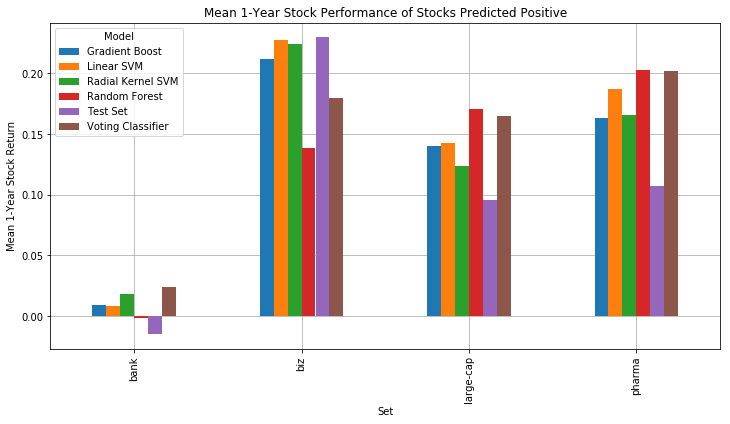

In [720]:
df = pd.DataFrame([['Test Set','large-cap',0.09532785954115405],['Test Set','biz',0.22961784128330412],
                   ['Test Set','bank', -0.01477205918332016],['Test Set', 'pharma', 0.10687630560082889],
                   ['Gradient Boost','large-cap', 0.1397106470585063],
                   ['Gradient Boost','biz',0.21174853929524376],['Gradient Boost','bank', 0.00859918574427903],
                  ['Gradient Boost', 'pharma', 0.16318821373942946],
                  ['Random Forest', 'large-cap', 0.1708978813079895], 
                   ['Random Forest', 'biz', 0.13864061257040855],
                  ['Random Forest', 'bank', -0.0015149940554214719],
                  ['Random Forest', 'pharma', 0.2031047372754275],
                  ['Linear SVM', 'large-cap', 0.1425778139414511],
                  ['Linear SVM', 'biz', 0.22733745755894447],
                  ['Linear SVM', 'bank', 0.008496683626457037],
                  ['Linear SVM', 'pharma', 0.18707448186853665],
                  ['Radial Kernel SVM', 'large-cap', 0.12346932466742211],
                  ['Radial Kernel SVM', 'biz', 0.22453463384424055],
                  ['Radial Kernel SVM', 'bank', 0.018185087522641342],
                  ['Radial Kernel SVM', 'pharma', 0.16582514638354262],
                  ['Voting Classifier', 'large-cap', 0.164891469811814],
                  ['Voting Classifier', 'biz', 0.17994416799595958],
                  ['Voting Classifier', 'bank', 0.023645410144221696],
                  ['Voting Classifier', 'pharma', 0.20149852099429902]],
                  columns=['Model','Set','val'])

ax = df.pivot("Set", "Model", "val").plot(kind='bar', figsize=(12,6))

plt.xlabel('Set')
plt.ylabel('Mean 1-Year Stock Return')
plt.title('Mean 1-Year Stock Performance of Stocks Predicted Positive')
ax.grid(zorder=0)
ax.set_axisbelow(True)

plt.show()

plt.savefig('return_results.pdf')

# Constructing Portfolios

In [308]:
import pandas_datareader as web
from iex import reference

In [309]:
iex_tickers = list(reference.symbols()['symbol'])

In [310]:
tickers = list()
for ticker in all_data_large_cap.ticker[X_test_large_cap.index]:
    if ticker not in tickers and ticker in iex_tickers:
        tickers.append(ticker)

In [641]:
tickers_pharma = list()
for ticker_p in all_data_pharma.ticker[X_test_pharma.index]:
    if ticker_p not in tickers_pharma and ticker_p in iex_tickers:
        tickers_pharma.append(ticker_p)

In [311]:
start_date = all_data_large_cap.datekey[X_test_large_cap.index].min()
end_date = all_data_large_cap.datekey[X_test_large_cap.index].max()

In [312]:
large_cap_port_stocks = all_data_large_cap.loc[pd.Series(X_test_large_cap.index),]

In [642]:
pharma_port_stocks = all_data_pharma.loc[pd.Series(X_test_pharma.index),]

In [ ]:
portfolio_stock_data = {tick: web.DataReader(tick, 'iex', 
                                               large_cap_port_stocks[large_cap_port_stocks.ticker==tick].datekey.min(), 
                                               large_cap_port_stocks[large_cap_port_stocks.ticker==tick].datekey.max() + dt.timedelta(days=365)) for tick in tickers}

In [ ]:
for tick in portfolio_stock_data:
    portfolio_stock_data[tick].index = pd.to_datetime(portfolio_stock_data[tick].index)

In [307]:
import bt

In [657]:
vote_predictions_tables_pharma.datekey.max()

Timestamp('2017-12-31 00:00:00')

In [490]:
vote_predictions_tables_cap['datekey'] = all_data_large_cap.loc[vote_predictions_tables_cap.index].datekey

In [643]:
vote_predictions_tables_pharma['datekey'] = all_data_pharma.loc[vote_predictions_tables_pharma.index].datekey

In [644]:
vote_predictions_tables_pharma.head()

,ticker,price_change,0,price_change%,datekey
1,ZYME,1.0,-1.0,0.933360,2017-12-31
4,XNCR,1.0,-1.0,0.649635,2017-12-31
5,XNCR,-1.0,-1.0,-0.167173,2016-12-31
15,WVE,1.0,-1.0,0.197721,2017-12-31
16,WVE,1.0,-1.0,0.342256,2016-12-31


In [488]:
cap_stock_data = pd.DataFrame()
for tick in tickers:
    try:
        cap_stock_data[tick] = bt.get(tick, start='2016-01-02', end='2019-02-03')[tick.lower()]
    except:
        print(tick)

BF.B
RDS.A
BRK.B


In [689]:
pharma_stock_data = pd.DataFrame()
for tick in tickers_pharma:
    try:
        pharma_stock_data[tick] = bt.get(tick, start='2016-01-02', end='2018-12-31')[tick.lower()]
    except:
        print(tick)

TIF
TER
TECK
TDC
TD
SYMC
SWN
SWKS
SU
STZ
SSL
SPWR
SPGI
SPG
SNV
SNPS
SNA
SLM
SLF
SKM
SJM
SIVB
SIRI
SIG
SEE
SCI
SCCO
RJF
NTAP
NGG
MXIM
BF.B
RDS.A
BRK.B


In [610]:
cap_indicator_mat = pd.DataFrame(np.zeros((len(cap_stock_data.index), len(cap_stock_data.columns))), 
                                 index=cap_stock_data.index, 
                                 columns=cap_stock_data.columns)

In [690]:
pharma_indicator_mat = pd.DataFrame(np.zeros((len(pharma_stock_data.index), len(pharma_stock_data.columns))), 
                                 index=pharma_stock_data.index, 
                                 columns=pharma_stock_data.columns)

In [647]:
pharma_indicator_mat.shape

(777, 854)

In [613]:
vote_predictions_tables_cap = vote_predictions_tables_cap[vote_predictions_tables_cap[0] == 1.0]

In [691]:
vote_predictions_tables_pharma = vote_predictions_tables_pharma[vote_predictions_tables_pharma[0] == 1.0]

In [681]:
vote_predictions_tables_pharma.datekey.min()

Timestamp('2016-01-02 00:00:00')

In [564]:
cap_pred_ticker_list = vote_predictions_tables_cap.ticker.unique()

In [692]:
pharma_pred_ticker_list = vote_predictions_tables_pharma.ticker.unique()

In [671]:
for ind in vote_predictions_tables_cap.index:
    tick = vote_predictions_tables_cap.loc[ind, 'ticker']
    if tick in cap_indicator_mat.columns:
        date = vote_predictions_tables_cap.datekey[ind]
        mask = (cap_indicator_mat.index >= date) & (cap_indicator_mat.index <= date + dt.timedelta(days=365))
        cap_indicator_mat.loc[mask, tick] = 1
    else: 
        try:
            cap_stock_data = cap_stock_data.drop([tick])
        except:
            continue

In [672]:
cap_stock_data_nona = cap_stock_data.fillna(cap_stock_data.mean())

In [688]:
'RDY' in pharma_stock_data.columns

False

In [693]:
for ind in vote_predictions_tables_pharma.index:
    tick = vote_predictions_tables_pharma.loc[ind, 'ticker']
    if tick in pharma_indicator_mat.columns:
        date = vote_predictions_tables_pharma.datekey[ind]
        mask = (pharma_indicator_mat.index >= date) & (pharma_indicator_mat.index <= date + dt.timedelta(days=365))
        pharma_indicator_mat.loc[mask, tick] = 1
    else: 
        continue

In [694]:
pharma_stock_data_nona = pharma_stock_data.fillna(pharma_stock_data.mean())

In [754]:
s_cap = bt.Strategy('large-cap voting classifier portfolio', [bt.algos.SelectWhere(cap_indicator_mat > 0),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

# now we create the Backtest
t = bt.Backtest(s_cap, cap_stock_data_nona)

# and let's run it!
res = bt.run(t)

large-cap voting classifier portfolio
0% [############################# ] 100% | ETA: 00:00:01

In [755]:
s_pharma = bt.Strategy('pharma voting classifier portfolio', [bt.algos.SelectWhere(pharma_indicator_mat > 0),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])

# now we create the Backtest
t_pharma = bt.Backtest(s_pharma, pharma_stock_data_nona)

# and let's run it!
res_pharma = bt.run(t_pharma)

pharma voting classifier portfolio
0% [############################# ] 100% | ETA: 00:00:00

/Users/daniel/anaconda3/lib/python3.7/site-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


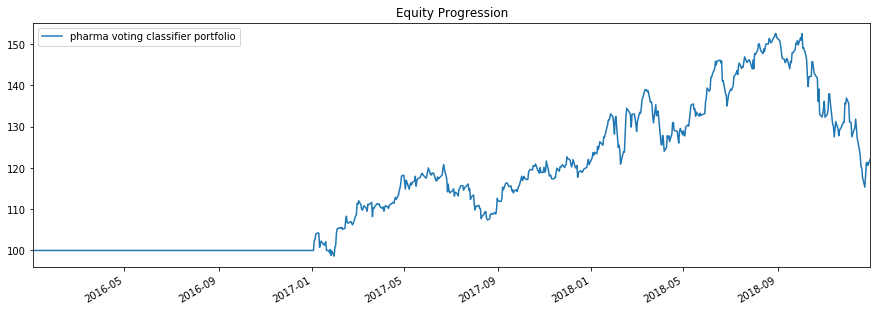

In [759]:
res_pharma.plot()

In [760]:
def long_only_ew(tickers, start='2017-01-01', end='2019-02-03', name='long_only_ew'):
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    data = bt.get(tickers, start=start)
    return bt.Backtest(s, data)

benchmark = long_only_ew('spy', name='spy')

In [761]:
res2 = bt.run(benchmark, t, t_pharma)

spy
0% [############################# ] 100% | ETA: 00:00:00

Text(0, 0.5, '% Return')

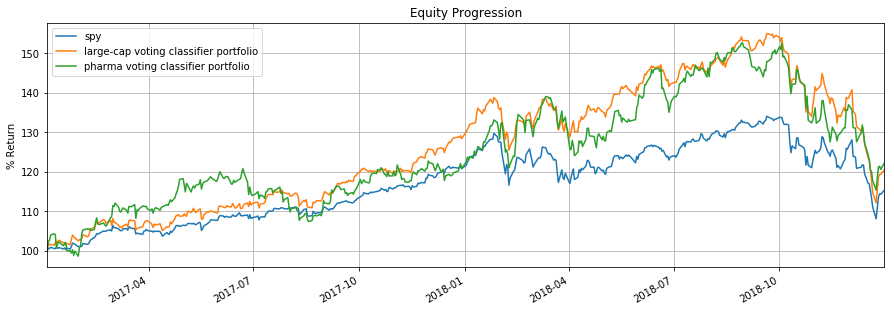

In [764]:
res2.plot()
plt.ylabel('% Return')
plt.grid()

plt.savefig('benchmark_returns.pdf')

In [752]:
res2.display()

Stat                 spy         large-cap voting classifier    pharma voting classifier
-------------------  ----------  -----------------------------  --------------------------
Start                2017-01-03  2017-01-03                     2017-01-03
End                  2018-12-31  2018-12-31                     2018-12-31
Risk-free rate       0.00%       0.00%                          0.00%

Total Return         15.26%      20.48%                         22.14%
Daily Sharpe         0.62        0.70                           0.61
Daily Sortino        0.91        1.07                           0.95
CAGR                 7.40%       9.81%                          10.57%
Max Drawdown         -19.35%     -27.63%                        -24.40%
Calmar Ratio         0.38        0.36                           0.43

MTD                  -8.80%      -13.11%                        -10.81%
3m                   -13.53%     -22.01%                        -18.47%
6m                   -6.92%      

In [306]:
import dill
dill.dump_session('save_your_stuff_idiot.db')

RecursionError: maximum recursion depth exceeded